# K-meansスクラッチ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
      
    Attributes
    ----------
    self.best_center_point
    
    self.best_sse
    
    self.best_label_list
    
    self.center_point_list
    
    self.gravity_list
    
    self.label_list
    
    self.sse_list
    
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        
        # 【問題６】
        sse_list = []
        center_tmp = []
        label_tmp = []
        for n in range(n_init):
            print("クラスタ{}個、{}回目の試行".format(self.n_clusters, n+1))
            self.initial_value(X)
            # 【問題５】
            for i in range(self.max_iter):
                self.nearest_center(X)
                center_point_before = np.copy(self.center_point_list)#.copy
                self.center_of_gravity(X)

                sa_index = np.sum(center_point_before - self.gravity_list, axis=0)

                if len(np.where(sa_index <= self.tol)[0])==X.shape[1]:
                    print("学習完了です。")
                    break
                    
            # 【問題６】
            sse = self.sum_of_squared_errors(X)
            sse_list.append(sse)
            center_tmp.append(self.center_point_list)
            print("SSE")
            print(sse)
            
            # ラベルを保管
            label_tmp.append(self.label_list)
            
            plt.xlabel('X1')
            plt.ylabel('X2')
            for p in range(self.n_clusters):
                index = np.where(self.label_list == p)[0]
                plt.scatter(X[index, 0], X[index, 1])
                plt.scatter(self.center_point_list[p:, 0], self.center_point_list[p:, 1], marker = "*")
            plt.show()
            
        # 【問題６】  
        sse_ndarray = np.array(sse_list)
        sse_min_index = np.nanargmin(sse_ndarray)#nan
        # SSEが最小の中心点を保管
        self.best_center_point = center_tmp[sse_min_index]
        print("SSEが最小になる中心点:\n{}".format(self.best_center_point))
        
        # SSE最小値を保管
        self.best_sse = sse_ndarray[sse_min_index]
        print("SSE最小値:\n{}".format(self.best_sse))
        
        # SSEが最小のラベルを保管
        self.best_label_list = label_tmp[sse_min_index]
        
    
    def initial_value(self, X):
        """
        初期値を作成するメソッド（ランダムに点を選んで中心点の初期値とする）
        """
        # 次元数（特徴量数）
        dim = X.shape[1]
        
        # サンプル数
        m = X.shape[0]
        
        #　ランダムにK個分の点を選ぶ
        index = random.sample(range(m), self.n_clusters)
        #index = np.random.randint(0, m, (self.n_clusters,))
        print("初期値：{}".format(index))
        
        #　ランダムにK個分の点を選ぶ
        coordinate_list = X[index]
        self.center_point_list = coordinate_list
        
        return self.center_point_list
    
    
    def sum_of_squared_errors(self, X):
        """
        SSE(sum_of_squared_errors)を求める
        """
        # 次元数（特徴量数）
        dim = X.shape[1]
        
        # サンプル数
        sample_num = X.shape[0]
        
        sigma_n = 0
        for n in range(sample_num):
            sigma_k = 0
            for k in range(self.n_clusters):
                r = 0
                if self.label_list[n] == k:
                    r = 1
                # ２点間の距離の短さ
                sigma_k += (r*np.abs(np.sum(X[n] - self.center_point_list[k], axis=0)**2))
            sigma_n += sigma_k
        
        sum_of_squared_errors = sigma_n
        
        return sum_of_squared_errors
    

    def nearest_center(self, X):
        """
        初期値を作成するメソッド（先にラベルを作って中心点の初期値を得る）
        """
        # サンプル数
        m = X.shape[0]
        
        # 中心点との近さ
        norm_list = []
        for i in range(X.shape[0]):
            b = X[i , :]
            norm = []
            for j in range(self.n_clusters):
                a = self.center_point_list[j, :]
                u = b - a
                norm.append(np.linalg.norm(u))
            norm_list.append(norm)
            
        norm_ndarray = np.array(norm_list)
        self.label_list = np.nanargmin(norm_ndarray, axis=1)#nan
        
        return self.label_list


    def center_of_gravity(self, X):
        """
        初期値を作成するメソッド（先にラベルを作って中心点の初期値を得る）
        """
        #print("self.center_point_lis：{}".format(self.center_point_list))
        
        # 次元数（特徴量数）
        dim = X.shape[1]
        
        # 重心座標用
        vector_list = []
        # ラベルでループ
        for k in range(self.n_clusters):
            label_index = np.where(self.label_list == k)[0]
            vector = []
            # 次元数分の重心座標を取得
            for d in range(dim):
                vector.append(np.mean(X[label_index, d]))
            # ラベルごとに座標を保管
            vector_list.append(vector)
            
        self.gravity_list = np.array(vector_list)
        
        # 中心点を重心で置き換え
        self.center_point_list = self.gravity_list
        
        return self.center_point_list
    

    def initial_value_NG(self, X):
        """
        初期値を作成するメソッド（先にラベルを作って中心点の初期値を得る）
        """
        # 次元数（特徴量数）
        dim = X.shape[1]
        
        # サンプル数
        m = X.shape[0]
        
        # サンプル数分のラベルを作成（各ラベルの件数が合わないという問題点あり）
        self.label_list = np.random.randint(0, self.n_clusters, (m,))
        
        #print("self.label_list：{}".format(self.label_list))
        
        # ラベルつき特徴量を作成
        #labeled_X = np.concatenate([X, label_list], axis=1)
        
        # 中心点座標用
        vector_list = []
        # ラベルでループ
        for k in range(self.n_clusters):
            label_index = np.where(self.label_list == k)[0]
            vector = []
            # 次元数分の中心座標を取得
            for d in range(dim):
                vector.append(np.mean(X[label_index, d]))
            # ラベルごとに座標を保管
            vector_list.append(vector)
            
        self.gravity_list = np.array(vector_list)
        
        #print(self.gravity_list)
        
        
        
        # 重心から先に決めるパターン
        
        ## 最大値と最小値（ランダムの範囲指定用）
        #max_list = np.amax(X, axis=0)
        #min_list = np.amin(X, axis=0)
        
        ## 座標用
        #coordinate_list = []
        #for k in range(self.n_clusters):
        #    coordinate = []
        #    # 各次元の最小値〜最大値に基づくランダム座標作成
        #    for d in  range(dim):
        #        coordinate.append(np.random.uniform(min_list[d], max_list[d]))
        #    coordinate_list.append(coordinate)
        #initial_value = np.array(coordinate_list)
        
        return


    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        # サンプル数
        m = X.shape[0]
        
        # 中心点との近さ
        norm_list = []
        for i in range(X.shape[0]):
            b = X[i , :]
            norm = []
            for j in range(self.n_clusters):
                a = self.best_center_point[j, :]
                u = b - a
                norm.append(np.linalg.norm(u))
            norm_list.append(norm)
            
        norm_ndarray = np.array(norm_list)
        pred = np.nanargmin(norm_ndarray, axis=1)#nan
        

        return pred
    
    

### クラスタリングのための人工データセット  
>クラスタリングを実験するための人工データセットを作成するコードを用意しています。
>
>このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。
>
>《シンプルデータセット3》

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [4]:
print(X.shape)

(100, 2)


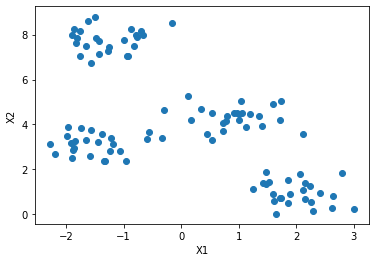

In [5]:
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X[:, 0], X[:, 1])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# 学習データとテストデータを80：２0で分割
# y_train, y_test  は使わない
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### 学習  
>K-meansの学習に必要な要素を順番に作成していきます。



## 【問題1】中心点の初期値を決める  
>入力されたデータから K 個の中心点 μ1 から μK の初期値を決めるコードを作成してください。  
>K は指定したクラスタ数です。
>
>最もシンプルな初期値の決定方法は、データ点 Xn の中からランダムに K 個選ぶことです。今回はこれを実装してください。
>
>K-meansの学習結果は中心点 μ の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

In [8]:
# 初期値
n_clusters=3#クラスタ数
n_init=10#中心点の初期値を何回変えて計算するか
max_iter=50#1回の計算で最大何イテレーションするか
tol=0.01#イテレーションを終了する基準となる中心点と重心の許容誤差

# インスタンス化
KMeans_q1 = ScratchKMeans(n_clusters, n_init, max_iter, tol)

In [9]:
KMeans_q1.initial_value(X_train)

初期値：[27, 1, 34]


array([[1.04829186, 5.03092408],
       [2.11872357, 1.09865834],
       [2.79939362, 1.84560825]])

## 【問題2】SSEを求める関数の作成  
>クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。
>
>K-meansはこのSSEを最小化する rnk と μk を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

In [10]:
KMeans_q1.initial_value_NG(X_train)
KMeans_q1.sum_of_squared_errors(X_train)

500.8865372965567

## 【問題3】クラスタへの割り当て  
>全てのデータ点 Xn を最も近い中心点 μk に割り当てるコードを作成してください。
>
>K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル p,q に対しては以下の数式で表現できます。
>
>$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$
>
>NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。
>
>numpy.linalg.norm — NumPy v1.17 Manual
>
>中心点 μk を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。



In [11]:
# 各サンプルについて分類したクラスを格納する配列を作成
KMeans_q1.nearest_center(X_train)

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## 【問題4】中心点の移動  
>中心点 μk を k 番目のクラスタに割り当てられる全てのデータ点 Xn の平均値（重心）に移動するコードを作成してください。
>
>クラスタの割り当て rnk を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。



In [12]:
KMeans_q1.center_of_gravity(X_train)

array([[-0.61230024,  5.05810695],
       [ 1.99426394,  0.86514759],
       [ 2.79939362,  1.84560825]])

## 【問題5】繰り返し  
>クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。
>次のどれかの条件を満たしたらこれを止めます。
>- 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
>- 中心点 μk と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）


クラスタ3個、1回目の試行
初期値：[70, 71, 19]
学習完了です。
SSE
178.97482423167003


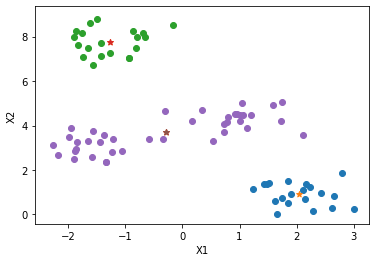

クラスタ3個、2回目の試行
初期値：[77, 51, 29]
学習完了です。
SSE
310.4389970627999


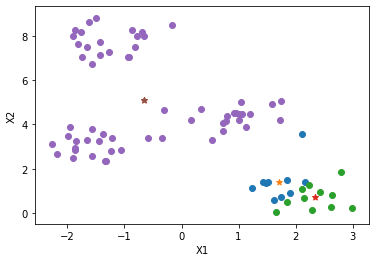

クラスタ3個、3回目の試行
初期値：[35, 36, 30]
学習完了です。
SSE
59.24734203028254


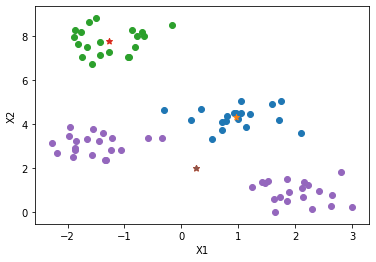

クラスタ3個、4回目の試行
初期値：[17, 70, 10]
学習完了です。
SSE
178.97482423167003


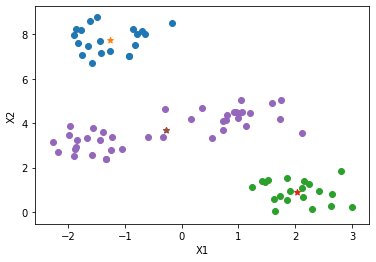

クラスタ3個、5回目の試行
初期値：[71, 12, 42]
学習完了です。
SSE
101.7978099993975


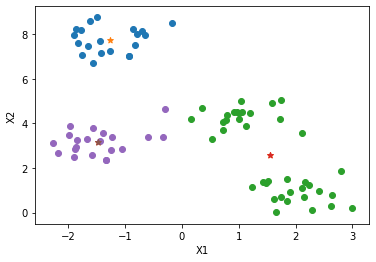

クラスタ3個、6回目の試行
初期値：[65, 54, 76]
学習完了です。
SSE
174.84368929516452


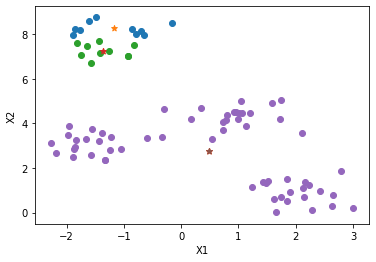

クラスタ3個、7回目の試行
初期値：[32, 8, 49]
学習完了です。
SSE
98.52457663291756


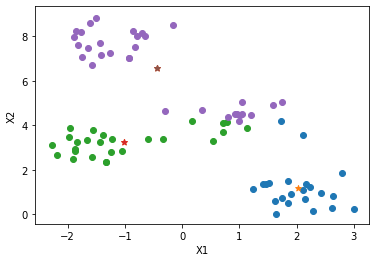

クラスタ3個、8回目の試行
初期値：[50, 62, 42]
学習完了です。
SSE
181.8489155494702


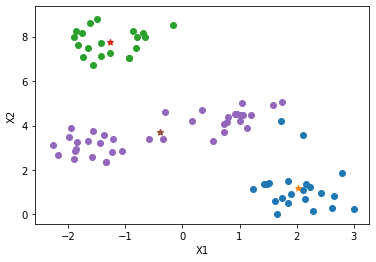

クラスタ3個、9回目の試行
初期値：[29, 58, 31]
学習完了です。
SSE
59.24734203028254


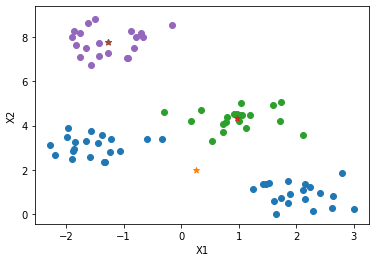

クラスタ3個、10回目の試行
初期値：[54, 17, 62]
学習完了です。
SSE
177.42008292220757


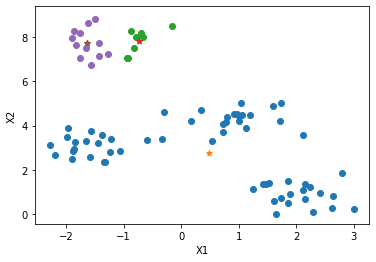

SSEが最小になる中心点:
[[ 0.96378346  4.32257132]
 [-1.2702941   7.76467286]
 [ 0.25206518  2.00062366]]
SSE最小値:
59.24734203028254


In [13]:
KMeans_q1.fit(X_train)

ベストとして選ばれた設定による図

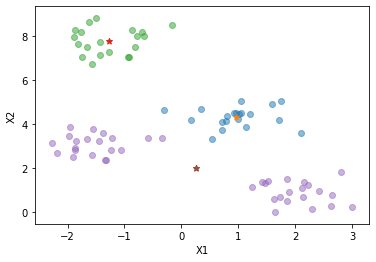

In [14]:
plt.xlabel('X1')
plt.ylabel('X2')
for p in range(KMeans_q1.n_clusters):
    index = np.where(KMeans_q1.best_label_list == p)[0]
    plt.scatter(X_train[index, 0], X_train[index, 1], alpha=0.5)
    plt.scatter(KMeans_q1.best_center_point[p:, 0], KMeans_q1.best_center_point[p:, 1], marker = "*")
plt.show()

## 【問題6】異なる初期値で計算  
>問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。
>
>複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 μk を保持しておきます。

In [15]:
# fit関数の中に追記(実行結果は同上)
# KMeans_q1.fit(X_train)

## 【問題7】推定  
>新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。
>
>- データ点 Xn と学習で決まった中心点 μk に対し、 SSE を最小化する rnk を選ぶ。
>
>具体的には次のことです。
>
>- データ点 Xn を最も近い μk に割り当てる。

In [16]:
y_pred = KMeans_q1.predict(X_test)
print(y_pred)

[0 2 0 1 0 2 2 1 2 1 2 0 2 1 1 2 2 0 2 0]


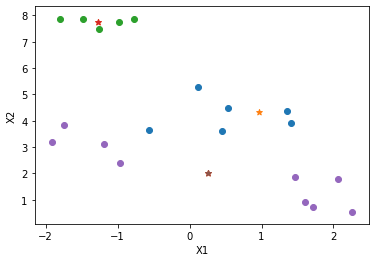

In [17]:
plt.xlabel('X1')
plt.ylabel('X2')
for p in range(KMeans_q1.n_clusters):
    index = np.where(y_pred == p)[0]
    plt.scatter(X_test[index, 0], X_test[index, 1])
    plt.scatter(KMeans_q1.best_center_point[p:, 0], KMeans_q1.best_center_point[p:, 1], marker = "*")
plt.show()

## 【問題8】エルボー法の実装  
>K-meansにおいて中心点の個数 k は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 k を検討するためのコードを作成してください。
>
>SSEを縦軸、クラスタ数 k を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

クラスタ2個、1回目の試行
初期値：[75, 67]
学習完了です。
SSE
181.95572928493087


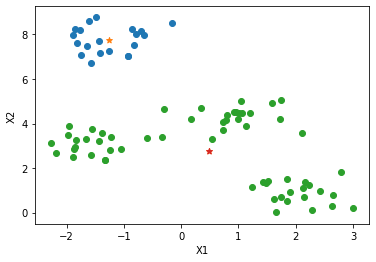

クラスタ2個、2回目の試行
初期値：[50, 66]
学習完了です。
SSE
310.45087029454237


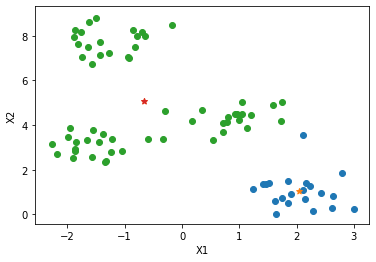

クラスタ2個、3回目の試行
初期値：[53, 42]
学習完了です。
SSE
205.90504524993386


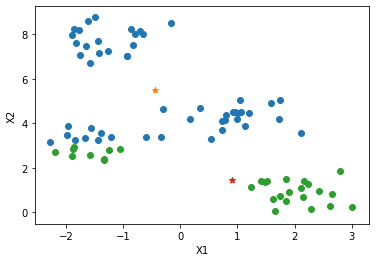

クラスタ2個、4回目の試行
初期値：[74, 37]
学習完了です。
SSE
181.95572928493087


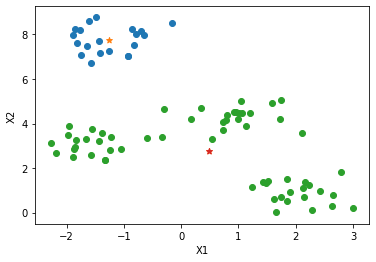

クラスタ2個、5回目の試行
初期値：[16, 71]
学習完了です。
SSE
181.95572928493087


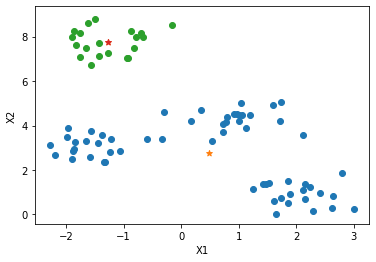

クラスタ2個、6回目の試行
初期値：[20, 74]
学習完了です。
SSE
181.95572928493087


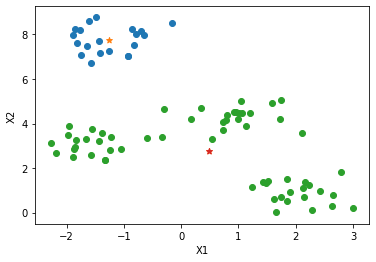

クラスタ2個、7回目の試行
初期値：[0, 33]
学習完了です。
SSE
337.68010585484967


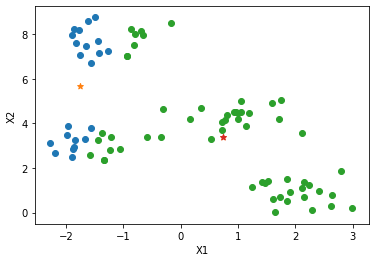

クラスタ2個、8回目の試行
初期値：[39, 1]
学習完了です。
SSE
315.8910683787514


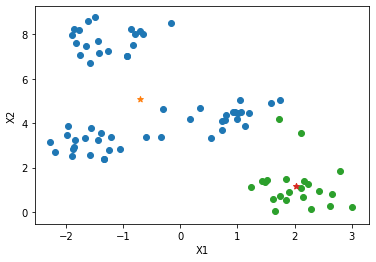

クラスタ2個、9回目の試行
初期値：[72, 16]
学習完了です。
SSE
181.95572928493087


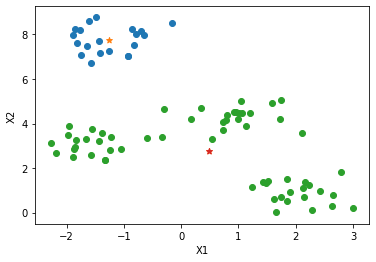

クラスタ2個、10回目の試行
初期値：[67, 12]
学習完了です。
SSE
181.95572928493087


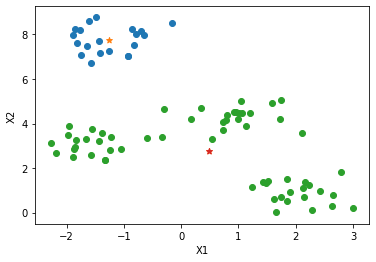

SSEが最小になる中心点:
[[-1.2702941   7.76467286]
 [ 0.4893046   2.77460621]]
SSE最小値:
181.95572928493087
クラスタ3個、1回目の試行
初期値：[58, 12, 9]
学習完了です。
SSE
117.66613344175236


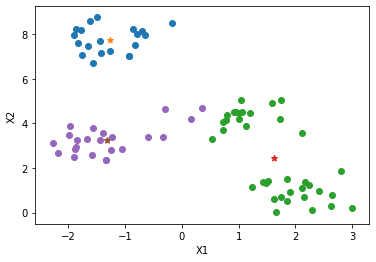

クラスタ3個、2回目の試行
初期値：[50, 9, 8]
学習完了です。
SSE
296.1979135076504


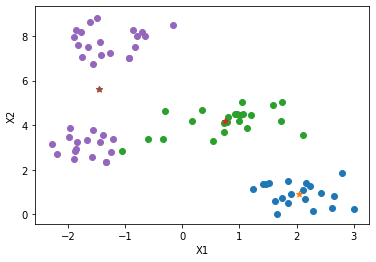

クラスタ3個、3回目の試行
初期値：[3, 78, 12]
学習完了です。
SSE
67.2042354358224


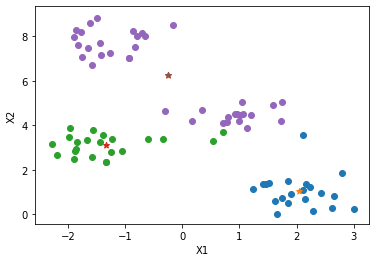

クラスタ3個、4回目の試行
初期値：[61, 11, 23]
学習完了です。
SSE
316.0742615372915


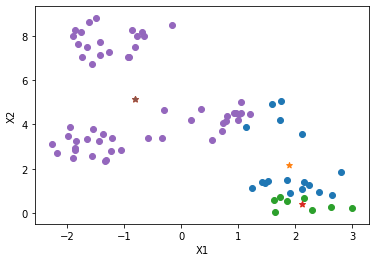

クラスタ3個、5回目の試行
初期値：[33, 73, 41]
学習完了です。
SSE
108.57679734239161


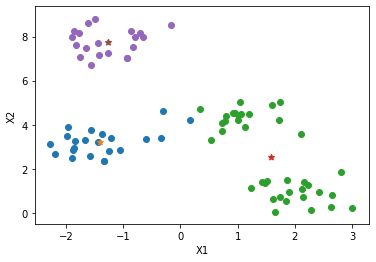

クラスタ3個、6回目の試行
初期値：[28, 75, 57]
学習完了です。
SSE
172.48474459779757


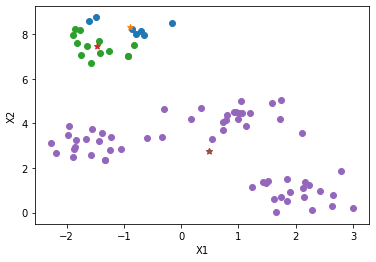

クラスタ3個、7回目の試行
初期値：[59, 71, 65]
学習完了です。
SSE
181.95572831274325


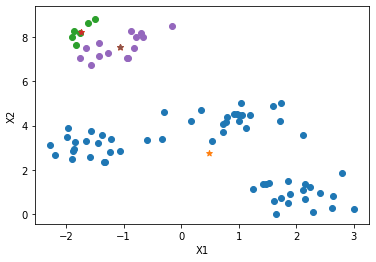

クラスタ3個、8回目の試行
初期値：[2, 3, 35]
学習完了です。
SSE
178.97482423167003


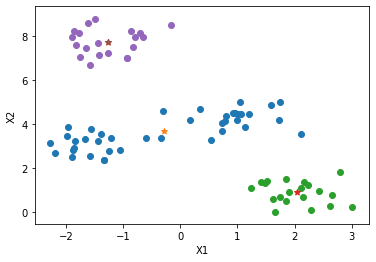

クラスタ3個、9回目の試行
初期値：[65, 62, 68]
学習完了です。
SSE
181.95572831274325


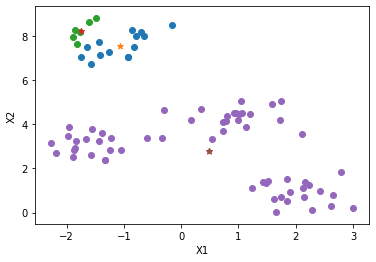

クラスタ3個、10回目の試行
初期値：[60, 62, 0]
学習完了です。
SSE
178.97482423167003


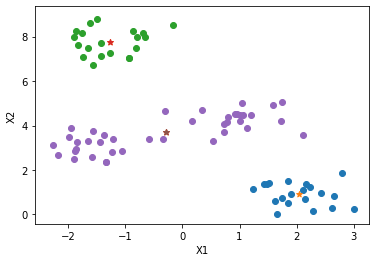

SSEが最小になる中心点:
[[ 2.03816932  1.04095319]
 [-1.33429803  3.12583609]
 [-0.25661095  6.24706537]]
SSE最小値:
67.2042354358224
クラスタ4個、1回目の試行
初期値：[26, 31, 63, 5]
学習完了です。
SSE
39.87057880764661


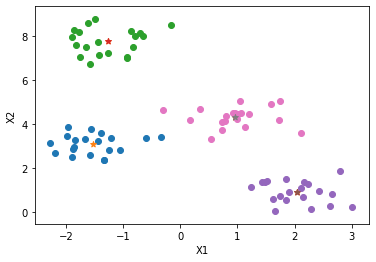

クラスタ4個、2回目の試行
初期値：[29, 53, 65, 12]
学習完了です。
SSE
39.87057880764661


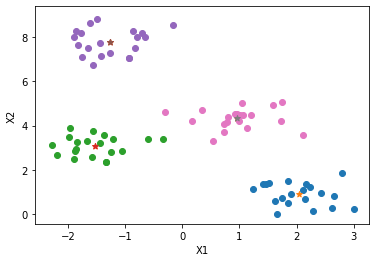

クラスタ4個、3回目の試行
初期値：[10, 43, 77, 76]
学習完了です。
SSE
133.17775758289045


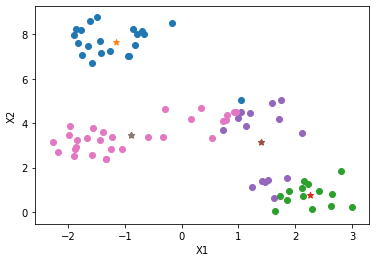

クラスタ4個、4回目の試行
初期値：[69, 59, 37, 1]
学習完了です。
SSE
39.87057880764661


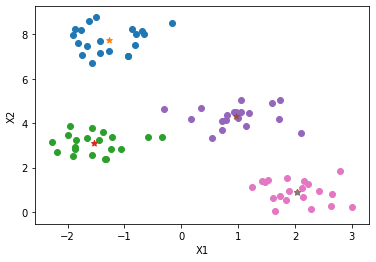

クラスタ4個、5回目の試行
初期値：[29, 0, 52, 27]
学習完了です。
SSE
39.87057880764661


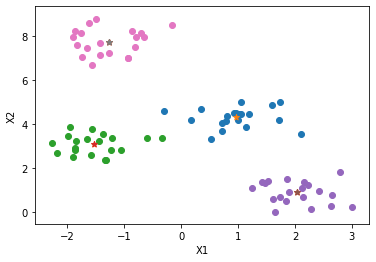

クラスタ4個、6回目の試行
初期値：[42, 38, 74, 17]
学習完了です。
SSE
140.2939161673846


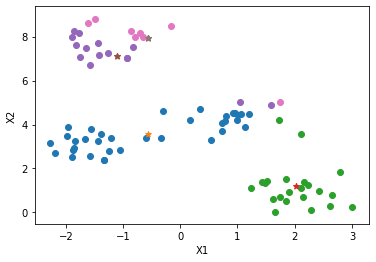

クラスタ4個、7回目の試行
初期値：[30, 16, 49, 11]
学習完了です。
SSE
69.12612146529948


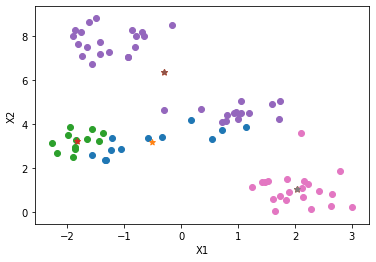

クラスタ4個、8回目の試行
初期値：[15, 12, 79, 41]
学習完了です。
SSE
39.87057880764661


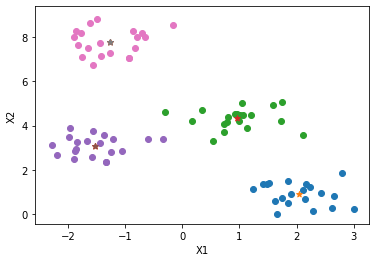

クラスタ4個、9回目の試行
初期値：[41, 47, 51, 49]
学習完了です。
SSE
177.389616717664


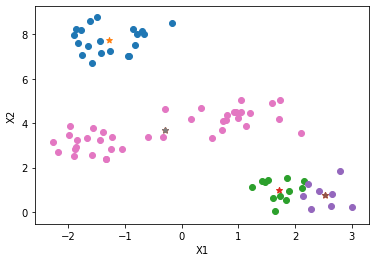

クラスタ4個、10回目の試行
初期値：[33, 39, 30, 78]
学習完了です。
SSE
128.07049806346507


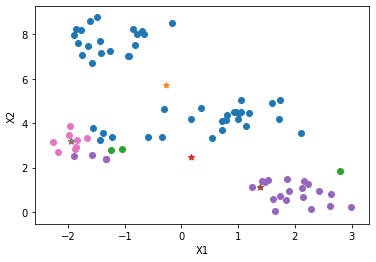

SSEが最小になる中心点:
[[-1.53039006  3.08707668]
 [-1.2702941   7.76467286]
 [ 2.03452042  0.91417063]
 [ 0.96378346  4.32257132]]
SSE最小値:
39.87057880764661
クラスタ5個、1回目の試行
初期値：[30, 53, 19, 5, 56]
学習完了です。
SSE
36.586558641662606


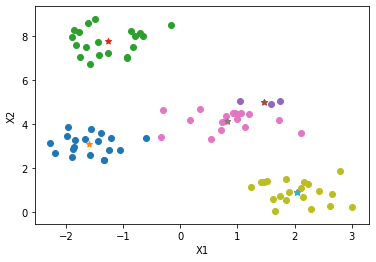

クラスタ5個、2回目の試行
初期値：[14, 78, 70, 44, 4]
学習完了です。
SSE
160.9992530932087


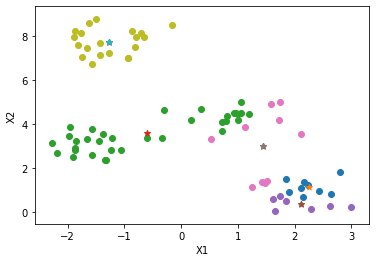

クラスタ5個、3回目の試行
初期値：[16, 11, 35, 72, 51]
学習完了です。
SSE
38.116299443603836


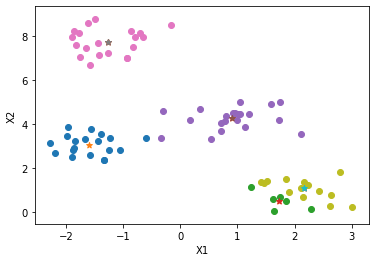

クラスタ5個、4回目の試行
初期値：[33, 30, 46, 77, 48]
学習完了です。
SSE
120.68326879556774


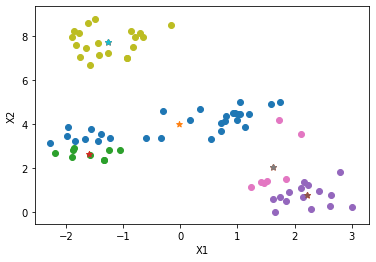

クラスタ5個、5回目の試行
初期値：[8, 10, 35, 52, 64]
学習完了です。
SSE
34.64524554074587


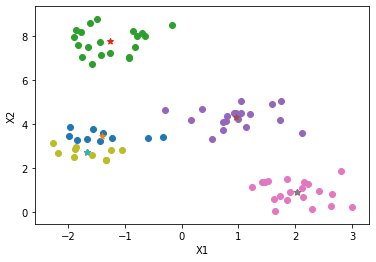

クラスタ5個、6回目の試行
初期値：[10, 64, 77, 7, 55]
学習完了です。
SSE
34.72264788673194


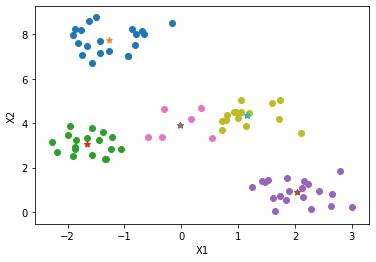

クラスタ5個、7回目の試行
初期値：[14, 51, 73, 54, 20]
学習完了です。
SSE
173.1458411165477


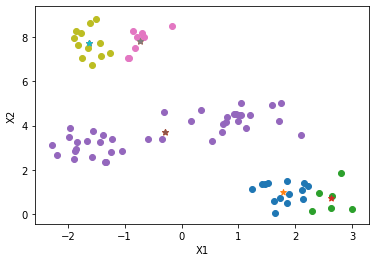

クラスタ5個、8回目の試行
初期値：[31, 51, 64, 75, 72]
学習完了です。
SSE
141.78277747425213


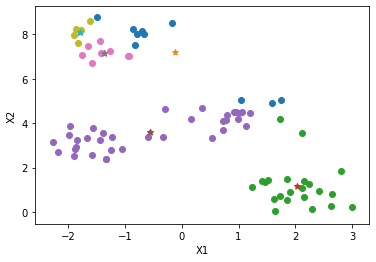

クラスタ5個、9回目の試行
初期値：[36, 38, 67, 76, 78]
学習完了です。
SSE
145.17369067358192


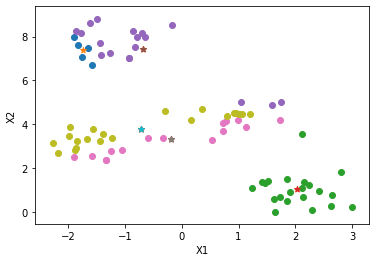

クラスタ5個、10回目の試行
初期値：[35, 6, 36, 50, 24]
学習完了です。
SSE
33.38869922740378


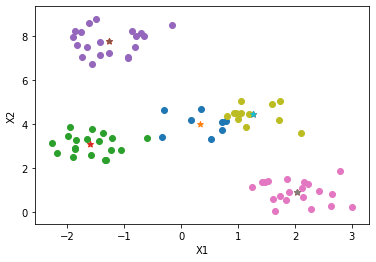

SSEが最小になる中心点:
[[ 0.33011656  4.02186435]
 [-1.59328788  3.07112693]
 [-1.2702941   7.76467286]
 [ 2.03452042  0.91417063]
 [ 1.25380039  4.43589489]]
SSE最小値:
33.38869922740378
クラスタ6個、1回目の試行
初期値：[39, 17, 55, 10, 1, 74]
学習完了です。
SSE
30.567018826493403


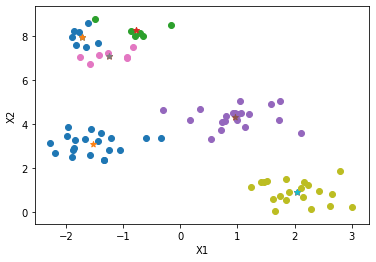

クラスタ6個、2回目の試行
初期値：[47, 44, 60, 36, 54, 62]
学習完了です。
SSE
136.62022359494895


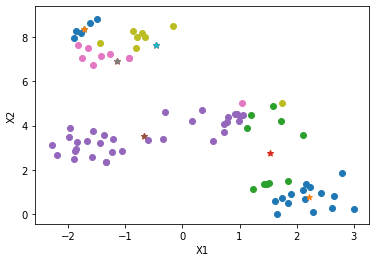

クラスタ6個、3回目の試行
初期値：[63, 40, 73, 15, 19, 49]
学習完了です。
SSE
35.29241117394597


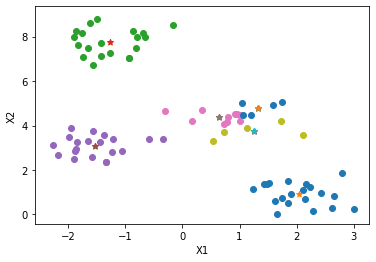

クラスタ6個、4回目の試行
初期値：[77, 54, 79, 32, 46, 62]
学習完了です。
SSE
39.818072251000295


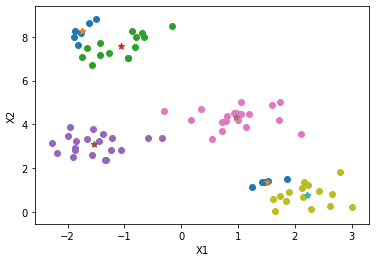

クラスタ6個、5回目の試行
初期値：[28, 51, 54, 59, 76, 57]
学習完了です。
SSE
120.02709941051398


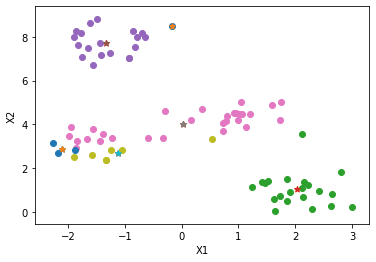

クラスタ6個、6回目の試行
初期値：[16, 50, 0, 77, 5, 79]
学習完了です。
SSE
123.792381565557


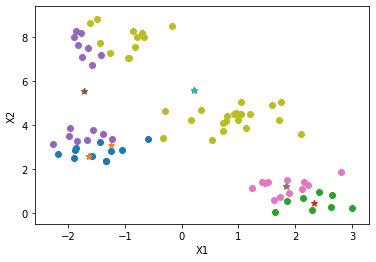

クラスタ6個、7回目の試行
初期値：[13, 52, 73, 15, 22, 45]
学習完了です。
SSE
31.83706805360511


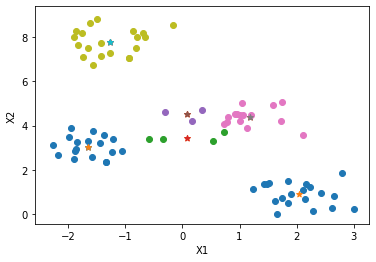

クラスタ6個、8回目の試行
初期値：[18, 60, 69, 68, 53, 3]
学習完了です。
SSE
29.490349274263977


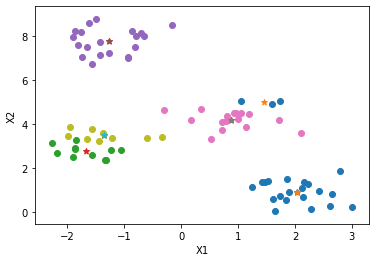

クラスタ6個、9回目の試行
初期値：[4, 64, 14, 31, 59, 49]
学習完了です。
SSE
30.618055216920226


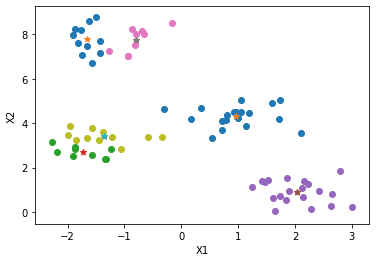

クラスタ6個、10回目の試行
初期値：[2, 23, 42, 59, 67, 57]
学習完了です。
SSE
106.71661424362583


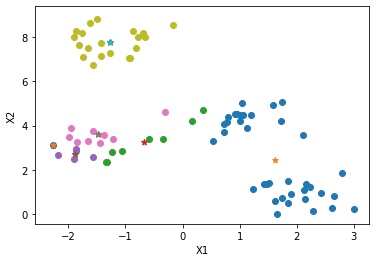

SSEが最小になる中心点:
[[ 1.46078899  4.99145602]
 [-1.67957874  2.75837083]
 [-1.2702941   7.76467286]
 [ 0.8760766   4.20453284]
 [-1.34804835  3.48882829]
 [ 2.03452042  0.91417063]]
SSE最小値:
29.490349274263977
クラスタ7個、1回目の試行
初期値：[61, 72, 73, 26, 56, 45, 79]
学習完了です。
SSE
29.689395360598166


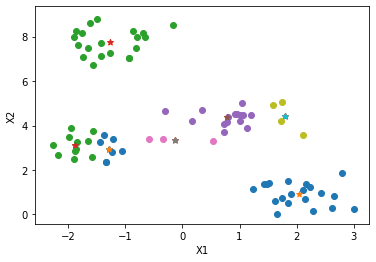

クラスタ7個、2回目の試行
初期値：[65, 48, 41, 10, 16, 28, 71]
学習完了です。
SSE
48.597040593001694


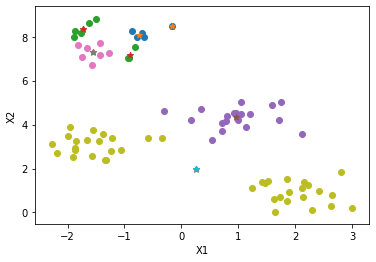

クラスタ7個、3回目の試行
初期値：[64, 42, 43, 72, 25, 26, 2]
学習完了です。
SSE
35.807066254934504


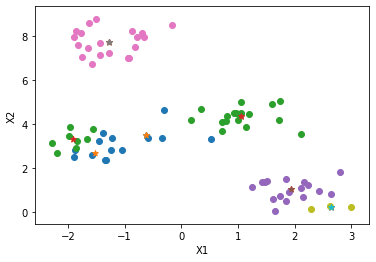

クラスタ7個、4回目の試行
初期値：[47, 75, 55, 21, 44, 2, 29]
学習完了です。
SSE
31.759174272592254


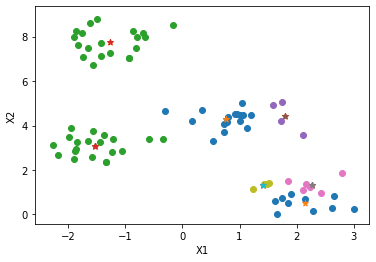

クラスタ7個、5回目の試行
初期値：[4, 58, 14, 62, 72, 34, 39]
学習完了です。
SSE
28.227025600115415


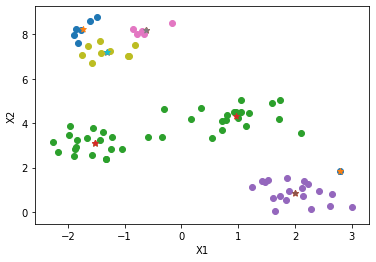

クラスタ7個、6回目の試行
初期値：[6, 38, 49, 76, 13, 73, 72]
学習完了です。
SSE
30.38182209518764


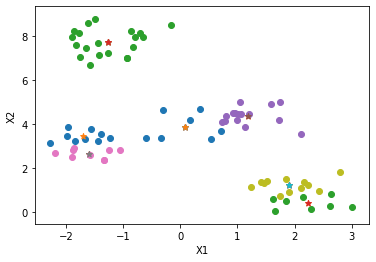

クラスタ7個、7回目の試行
初期値：[3, 41, 77, 54, 13, 4, 72]
学習完了です。
SSE
27.96750396805014


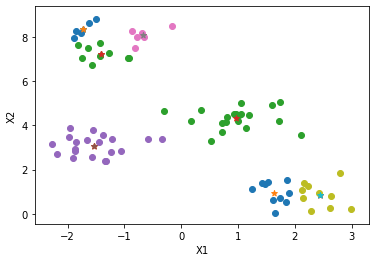

クラスタ7個、8回目の試行
初期値：[23, 24, 54, 6, 34, 55, 67]
学習完了です。
SSE
25.71250093221585


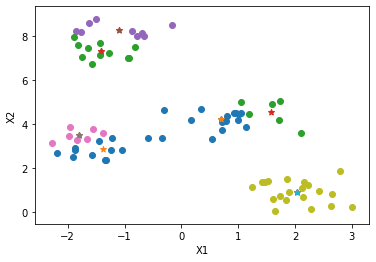

クラスタ7個、9回目の試行
初期値：[68, 32, 9, 50, 48, 78, 30]
学習完了です。
SSE
30.165833983712655


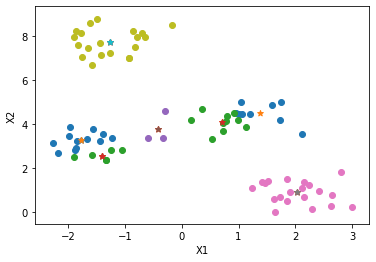

クラスタ7個、10回目の試行
初期値：[38, 10, 7, 48, 40, 69, 43]
学習完了です。
SSE
167.83528403713095


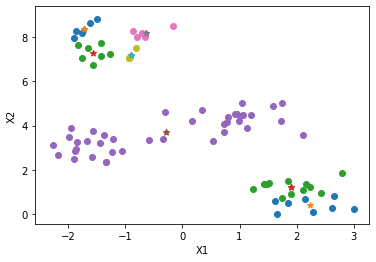

SSEが最小になる中心点:
[[-1.38076108  2.87106248]
 [ 1.56917094  4.5371342 ]
 [-1.10123906  8.30487503]
 [-1.80827247  3.48824592]
 [ 2.03452042  0.91417063]
 [ 0.70433168  4.2306158 ]
 [-1.40861186  7.32268927]]
SSE最小値:
25.71250093221585
クラスタ8個、1回目の試行
初期値：[18, 61, 55, 29, 54, 57, 70, 66]
学習完了です。
SSE
26.798795501752725


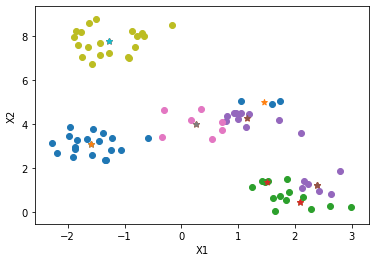

クラスタ8個、2回目の試行
初期値：[55, 79, 77, 9, 29, 42, 4, 58]
学習完了です。
SSE
25.737948847556225


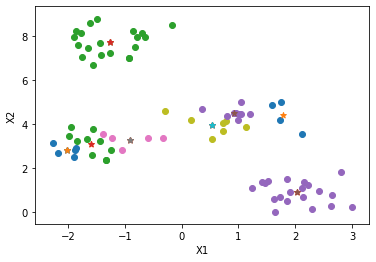

クラスタ8個、3回目の試行
初期値：[75, 42, 55, 28, 78, 76, 64, 7]
学習完了です。
SSE
29.226085299588583


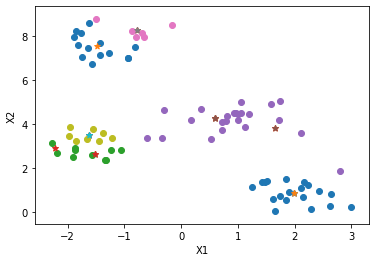

クラスタ8個、4回目の試行
初期値：[56, 62, 66, 41, 38, 26, 24, 72]
学習完了です。
SSE
28.927052164360788


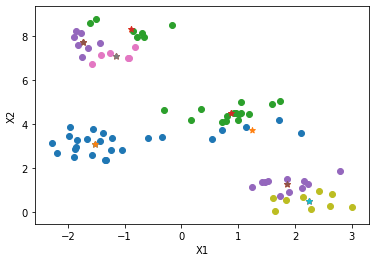

クラスタ8個、5回目の試行
初期値：[17, 3, 50, 15, 52, 43, 2, 66]
学習完了です。
SSE
29.403139389153594


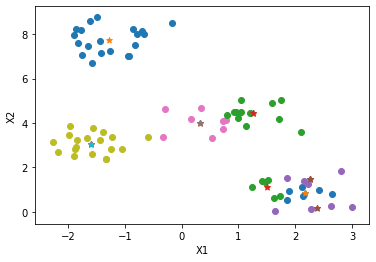

クラスタ8個、6回目の試行
初期値：[57, 55, 69, 8, 13, 34, 47, 21]
学習完了です。
SSE
28.430246437624827


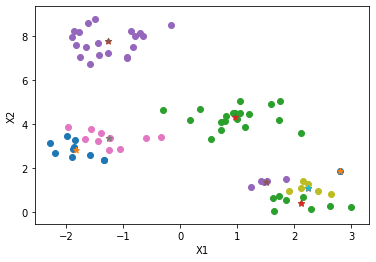

クラスタ8個、7回目の試行
初期値：[42, 26, 61, 35, 56, 64, 47, 5]
学習完了です。
SSE
31.981751872794824


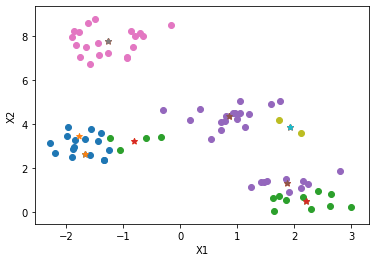

クラスタ8個、8回目の試行
初期値：[12, 14, 25, 9, 15, 68, 10, 61]
学習完了です。
SSE
26.726831413786527


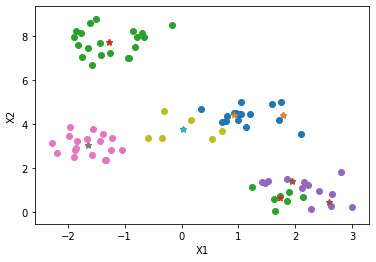

クラスタ8個、9回目の試行
初期値：[6, 5, 55, 64, 71, 32, 10, 21]
学習完了です。
SSE
21.504709500416332


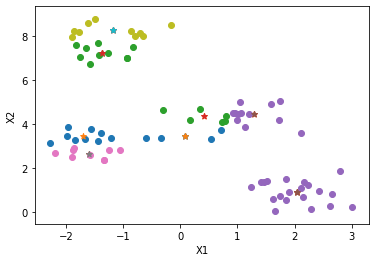

クラスタ8個、10回目の試行
初期値：[39, 2, 54, 6, 51, 42, 0, 12]
学習完了です。
SSE
28.225692736282138


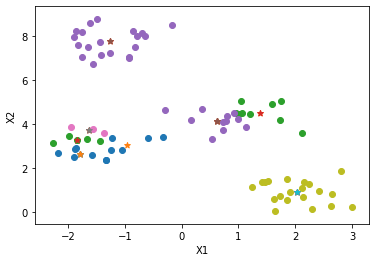

SSEが最小になる中心点:
[[-1.70237099  3.44801167]
 [ 0.4208889   4.35664904]
 [ 1.29142425  4.44038932]
 [-1.59533403  2.66093356]
 [-1.18058357  8.27128607]
 [ 0.08119714  3.44697173]
 [-1.36000463  7.25805965]
 [ 2.03452042  0.91417063]]
SSE最小値:
21.504709500416332


In [18]:
# 初期値
#n_clusters=3#クラスタ数
n_init=10#中心点の初期値を何回変えて計算するか
max_iter=50#1回の計算で最大何イテレーションするか
tol=0.01#イテレーションを終了する基準となる中心点と重心の許容誤差

# インスタンス化
KMeans_k2 = ScratchKMeans(2, n_init, max_iter, tol)
KMeans_k3 = ScratchKMeans(3, n_init, max_iter, tol)
KMeans_k4 = ScratchKMeans(4, n_init, max_iter, tol)
KMeans_k5 = ScratchKMeans(5, n_init, max_iter, tol)
KMeans_k6 = ScratchKMeans(6, n_init, max_iter, tol)
KMeans_k7 = ScratchKMeans(7, n_init, max_iter, tol)
KMeans_k8 = ScratchKMeans(8, n_init, max_iter, tol)
KMeans_k2.fit(X_train)
KMeans_k3.fit(X_train)
KMeans_k4.fit(X_train)
KMeans_k5.fit(X_train)
KMeans_k6.fit(X_train)
KMeans_k7.fit(X_train)
KMeans_k8.fit(X_train)

In [19]:
# SSE値の抜き出し
sse_graph = [KMeans_k2.best_sse, 
            KMeans_k3.best_sse, 
            KMeans_k4.best_sse, 
            KMeans_k5.best_sse, 
            KMeans_k6.best_sse, 
            KMeans_k7.best_sse, 
            KMeans_k8.best_sse
            ]

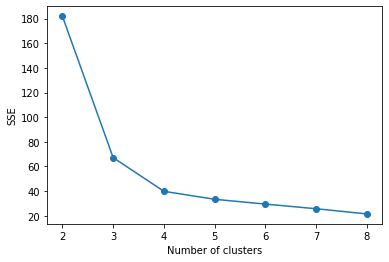

In [20]:
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
x = np.arange(2, 9)
plt.plot(x, sse_graph, marker="o")

# クラスタ分析

### 卸売業者のデータ分析  
>クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。
>
>UCI Machine Learning Repository: Wholesale customers Data Set
>
>Data Folderの中から`Wholesale customers data.csv`をダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。`Region`と`Channel`は取り覗き、金額のデータでK-meansを利用します。



### 次元削減  
>金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。



In [30]:
import pandas as pd

csv_path = "./Wholesale_customers_data/Wholesale customers data.csv" # ファイル名（パス）を指定する
df = pd.read_csv(csv_path)
df_label = df
df = df.drop(['Channel', 'Region'], axis=1)
display(df)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [31]:
wholesale_ndarray = np.array(df)
print(wholesale_ndarray)

[[12669  9656  7561   214  2674  1338]
 [ 7057  9810  9568  1762  3293  1776]
 [ 6353  8808  7684  2405  3516  7844]
 ...
 [14531 15488 30243   437 14841  1867]
 [10290  1981  2232  1038   168  2125]
 [ 2787  1698  2510    65   477    52]]


#### PCA（次元削減）  
多次元データの可視化のため、次元削減を行う。

#### 対数変換  
PCAは正規分布でないと対応していないため対数変換により正規分布に近づける。

In [32]:
wholesale_ndarray = np.log(wholesale_ndarray)
print(wholesale_ndarray)

[[ 9.44691334  9.17533476  8.93075874  5.36597602  7.89133076  7.19893124]
 [ 8.86177531  9.19115755  9.16617948  7.47420481  8.09955428  7.48211892]
 [ 8.75668242  9.08341568  8.94689552  7.78530518  8.16507926  8.96750419]
 ...
 [ 9.58403958  9.64782081 10.31702003  6.0799332   9.6051489   7.53208814]
 [ 9.23892783  7.59135705  7.71065332  6.94505106  5.12396398  7.66152708]
 [ 7.93272103  7.43720637  7.82803803  4.17438727  6.16751649  3.95124372]]


#### DIVER サンプルコードによる PCA（次元削減）

In [33]:
from sklearn.decomposition import PCA
data = wholesale_ndarray

pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

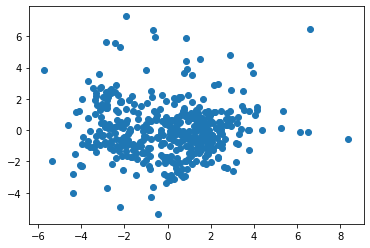

In [34]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.show()

[0.44237417 0.71894523 0.83511865 0.93129585 0.97705265 1.        ]


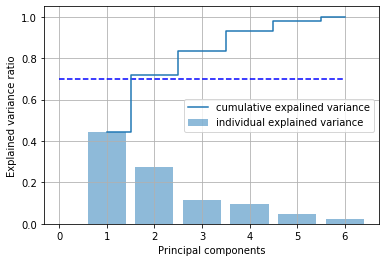

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

上記の通り、６次元を２次元まで削減してもデータとして分析が成立することを確認。

#### エルボー図の表示

クラスタ2個、1回目の試行
初期値：[208, 131]
学習完了です。
SSE
2229.5015769060474


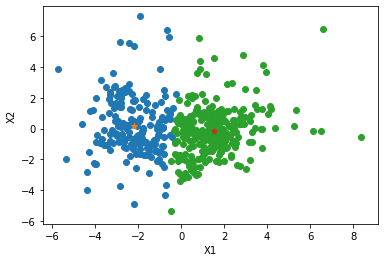

クラスタ2個、2回目の試行
初期値：[136, 405]
学習完了です。
SSE
2229.5015769060474


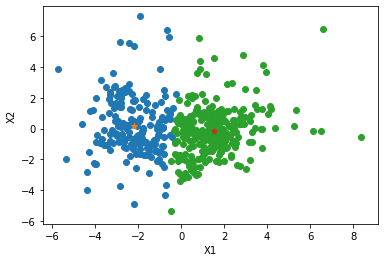

クラスタ2個、3回目の試行
初期値：[127, 399]
学習完了です。
SSE
2229.5015769060474


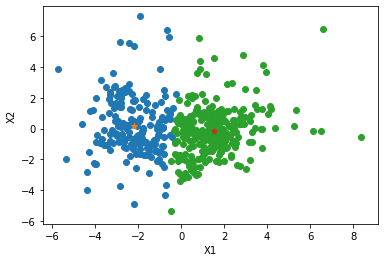

クラスタ2個、4回目の試行
初期値：[424, 288]
学習完了です。
SSE
2229.5015769060474


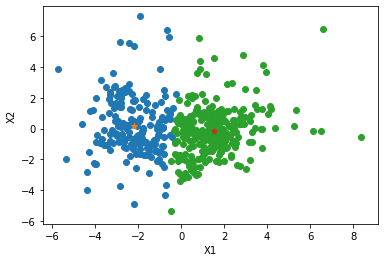

クラスタ2個、5回目の試行
初期値：[407, 193]
学習完了です。
SSE
2292.4275713228712


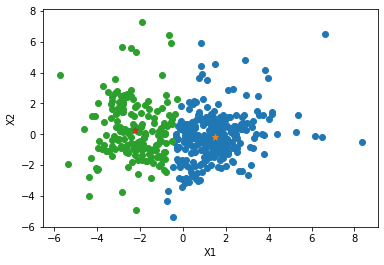

クラスタ2個、6回目の試行
初期値：[222, 261]
学習完了です。
SSE
2229.5015769060474


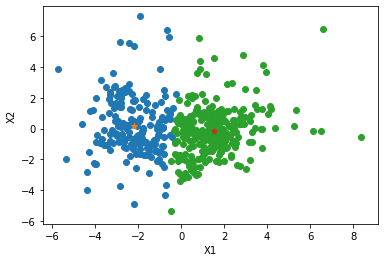

クラスタ2個、7回目の試行
初期値：[248, 272]
学習完了です。
SSE
2292.4275713228712


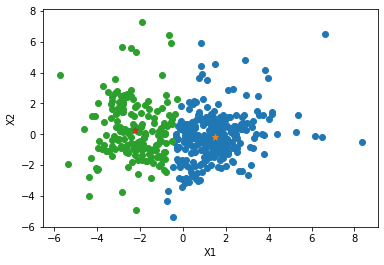

クラスタ2個、8回目の試行
初期値：[377, 374]
学習完了です。
SSE
2288.354852009783


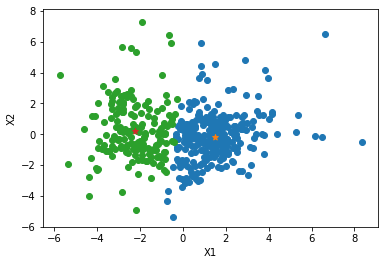

クラスタ2個、9回目の試行
初期値：[154, 291]
学習完了です。
SSE
2229.5015769060474


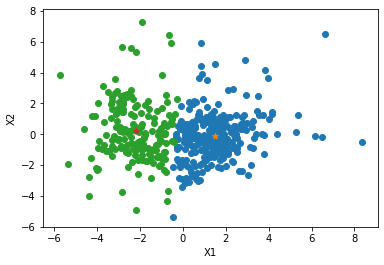

クラスタ2個、10回目の試行
初期値：[91, 222]
学習完了です。
SSE
2229.5015769060474


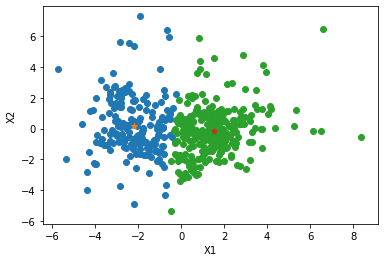

SSEが最小になる中心点:
[[-2.19772452  0.19474372]
 [ 1.52150159 -0.13482258]]
SSE最小値:
2229.5015769060474
クラスタ3個、1回目の試行
初期値：[151, 361, 136]
学習完了です。
SSE
1579.0508854316338


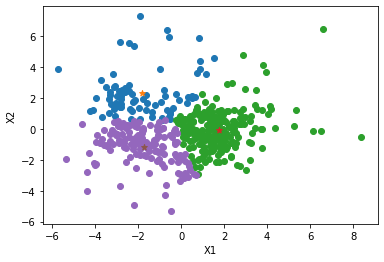

クラスタ3個、2回目の試行
初期値：[355, 220, 86]
学習完了です。
SSE
1644.426882758494


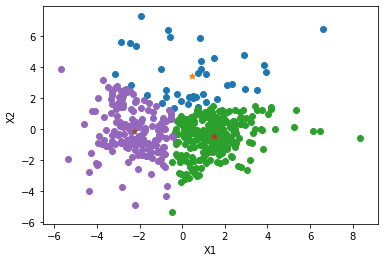

クラスタ3個、3回目の試行
初期値：[8, 291, 134]
学習完了です。
SSE
1470.7715726504066


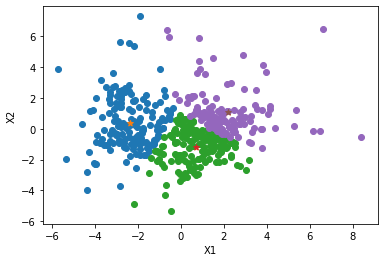

クラスタ3個、4回目の試行
初期値：[101, 245, 48]
学習完了です。
SSE
3099.3317288533676


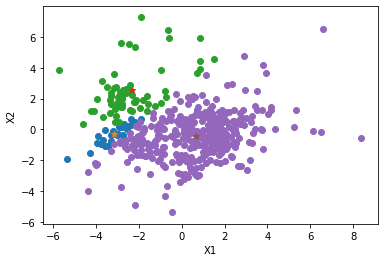

クラスタ3個、5回目の試行
初期値：[186, 87, 248]
学習完了です。
SSE
1563.703309715233


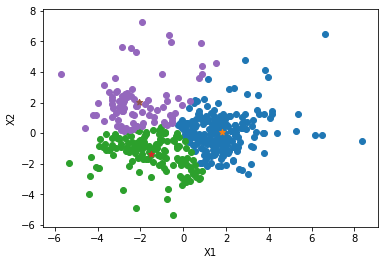

クラスタ3個、6回目の試行
初期値：[282, 437, 353]
学習完了です。
SSE
2319.212517755949


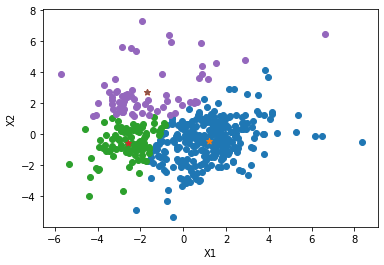

クラスタ3個、7回目の試行
初期値：[151, 228, 340]
学習完了です。
SSE
1718.615969596853


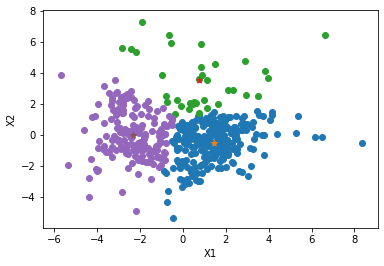

クラスタ3個、8回目の試行
初期値：[210, 211, 407]
学習完了です。
SSE
1939.444343099867


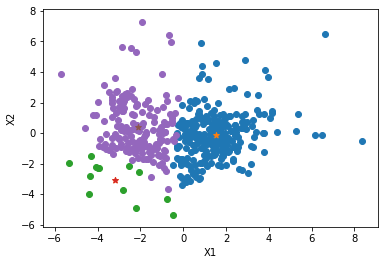

クラスタ3個、9回目の試行
初期値：[109, 268, 242]
学習完了です。
SSE
1567.336284736115


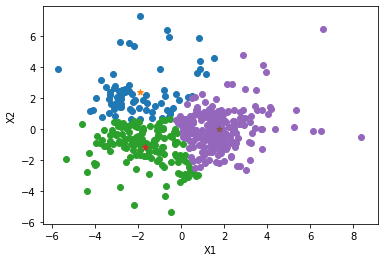

クラスタ3個、10回目の試行
初期値：[323, 42, 49]
学習完了です。
SSE
2266.8408795431483


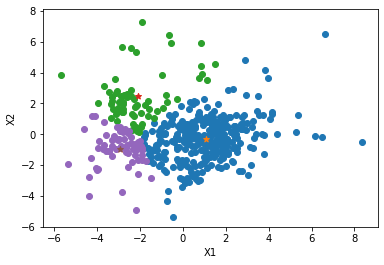

SSEが最小になる中心点:
[[-2.37455042  0.3671748 ]
 [ 0.68657966 -1.19587522]
 [ 2.17480509  1.09283949]]
SSE最小値:
1470.7715726504066
クラスタ4個、1回目の試行
初期値：[35, 110, 54, 308]
学習完了です。
SSE
1316.2717211318861


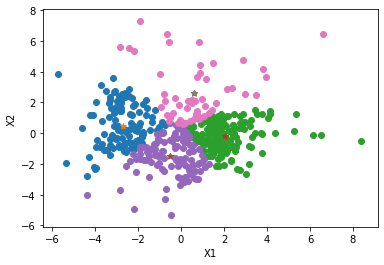

クラスタ4個、2回目の試行
初期値：[306, 136, 423, 240]
学習完了です。
SSE
1888.6833670367478


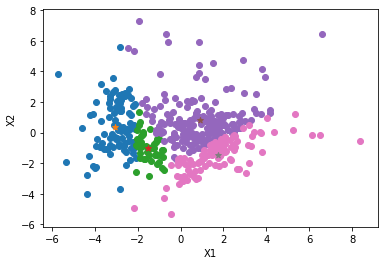

クラスタ4個、3回目の試行
初期値：[188, 58, 106, 258]
学習完了です。
SSE
1457.436799323972


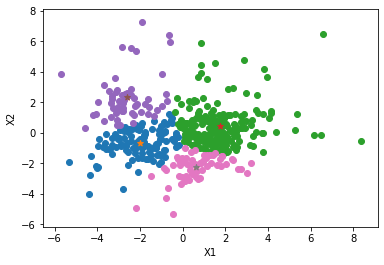

クラスタ4個、4回目の試行
初期値：[154, 420, 219, 278]
学習完了です。
SSE
1375.584853866976


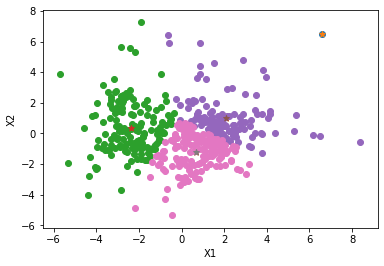

クラスタ4個、5回目の試行
初期値：[215, 2, 432, 227]
学習完了です。
SSE
1379.5424086434698


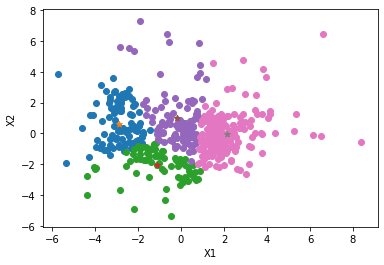

クラスタ4個、6回目の試行
初期値：[14, 177, 394, 67]
学習完了です。
SSE
1576.444747633238


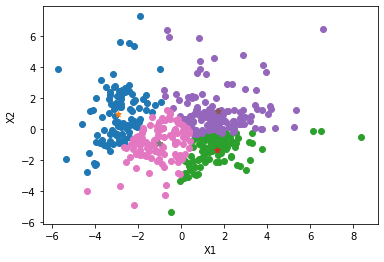

クラスタ4個、7回目の試行
初期値：[86, 158, 407, 335]
学習完了です。
SSE
2317.674347553451


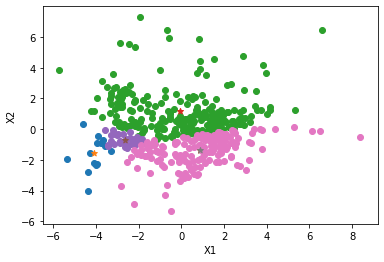

クラスタ4個、8回目の試行
初期値：[217, 350, 379, 4]
学習完了です。
SSE
1213.9828252430739


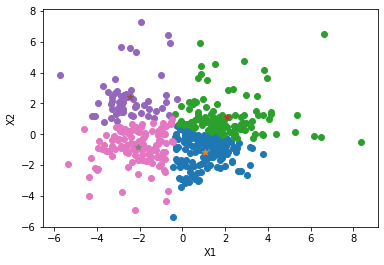

クラスタ4個、9回目の試行
初期値：[401, 95, 228, 251]
学習完了です。
SSE
1689.7783159834896


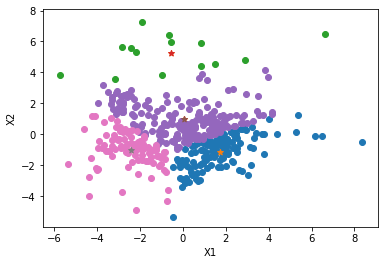

クラスタ4個、10回目の試行
初期値：[398, 288, 137, 52]
学習完了です。
SSE
1209.25149004195


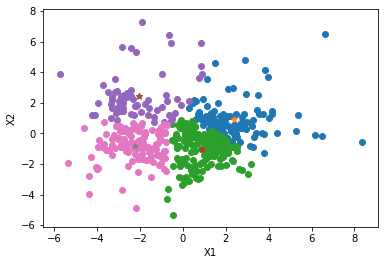

SSEが最小になる中心点:
[[ 2.39414814  0.92201101]
 [ 0.89462013 -1.05125865]
 [-2.03263269  2.4180681 ]
 [-2.21904092 -0.85024463]]
SSE最小値:
1209.25149004195
クラスタ5個、1回目の試行
初期値：[213, 145, 127, 394, 419]
学習完了です。
SSE
1216.5976817168414


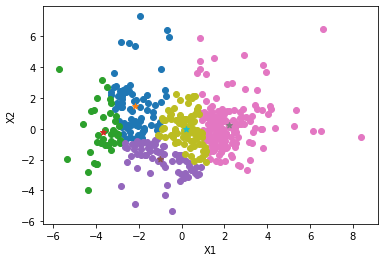

クラスタ5個、2回目の試行
初期値：[397, 356, 409, 342, 95]
学習完了です。
SSE
851.3467180365847


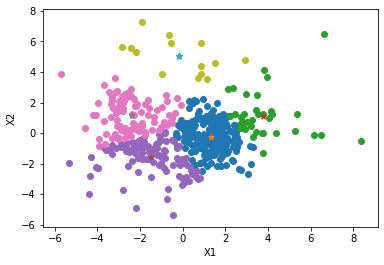

クラスタ5個、3回目の試行
初期値：[157, 331, 325, 218, 274]
学習完了です。
SSE
1596.008879612848


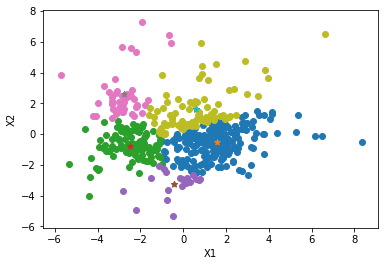

クラスタ5個、4回目の試行
初期値：[193, 337, 224, 276, 332]
学習完了です。
SSE
1153.1789994322303


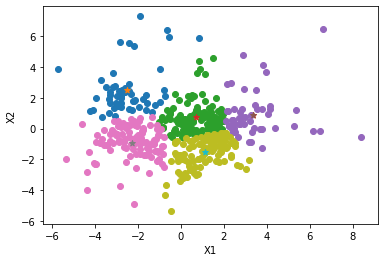

クラスタ5個、5回目の試行
初期値：[327, 56, 396, 70, 247]
学習完了です。
SSE
900.1102338355707


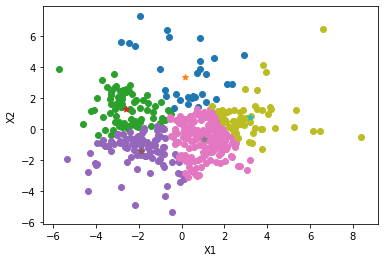

クラスタ5個、6回目の試行
初期値：[311, 393, 276, 285, 183]
学習完了です。
SSE
940.6980938037163


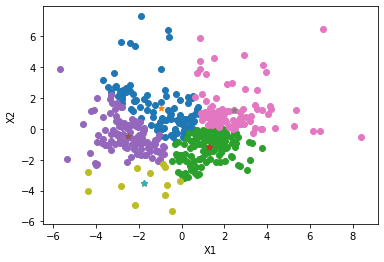

クラスタ5個、7回目の試行
初期値：[118, 18, 378, 173, 28]
学習完了です。
SSE
1096.3649112331586


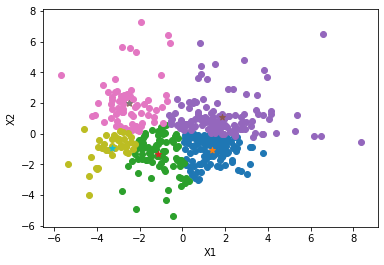

クラスタ5個、8回目の試行
初期値：[109, 315, 10, 177, 81]
学習完了です。
SSE
1084.2117644975126


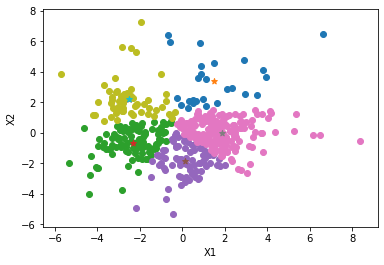

クラスタ5個、9回目の試行
初期値：[77, 100, 287, 409, 417]
学習完了です。
SSE
1633.6397317436827


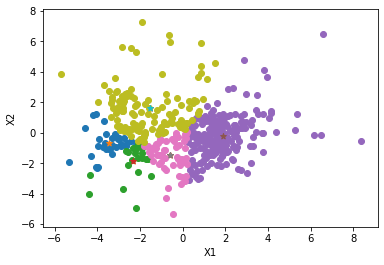

クラスタ5個、10回目の試行
初期値：[413, 348, 196, 289, 246]
学習完了です。
SSE
1062.0268579527203


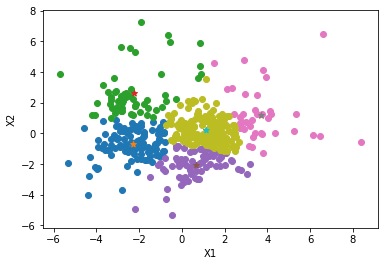

SSEが最小になる中心点:
[[ 1.31531418 -0.23455681]
 [ 3.75296781  1.12378776]
 [-1.46959164 -1.59181252]
 [-2.39592337  1.15919089]
 [-0.19596647  5.05255655]]
SSE最小値:
851.3467180365847
クラスタ6個、1回目の試行
初期値：[317, 40, 24, 310, 85, 436]
学習完了です。
SSE
1538.1702525325516


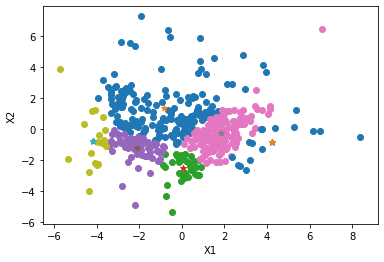

クラスタ6個、2回目の試行
初期値：[100, 52, 260, 297, 422, 94]
学習完了です。
SSE
1269.920365857568


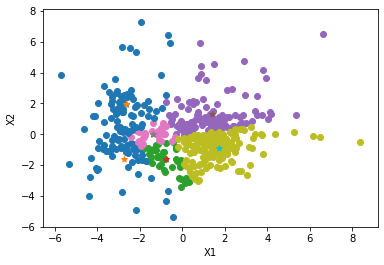

クラスタ6個、3回目の試行
初期値：[182, 10, 250, 177, 302, 418]
学習完了です。
SSE
1413.288574447935


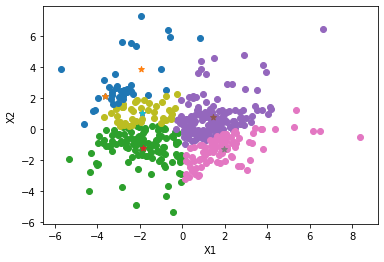

クラスタ6個、4回目の試行
初期値：[113, 392, 372, 408, 291, 45]
学習完了です。
SSE
874.9815022674575


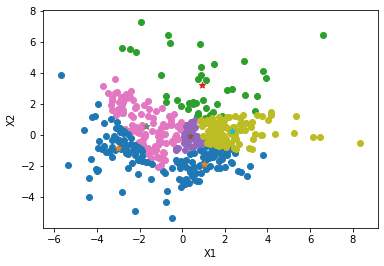

クラスタ6個、5回目の試行
初期値：[386, 87, 161, 362, 197, 65]
学習完了です。
SSE
944.4869481786744


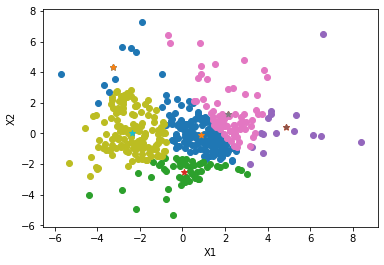

クラスタ6個、6回目の試行
初期値：[11, 171, 361, 6, 120, 205]
学習完了です。
SSE
944.3220470832534


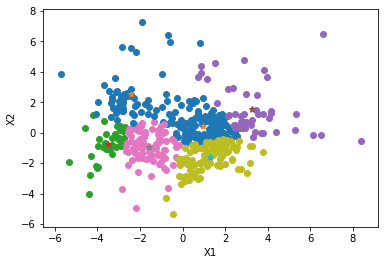

クラスタ6個、7回目の試行
初期値：[91, 193, 42, 131, 160, 30]
学習完了です。
SSE
903.8578384267478


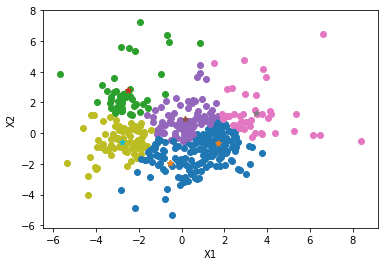

クラスタ6個、8回目の試行
初期値：[380, 262, 152, 27, 338, 76]
学習完了です。
SSE
863.1511649632668


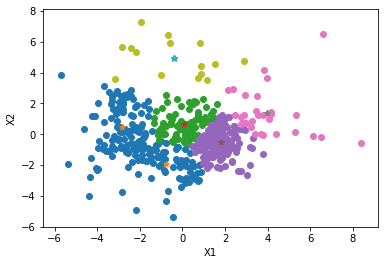

クラスタ6個、9回目の試行
初期値：[87, 404, 85, 431, 15, 214]
学習完了です。
SSE
1145.8381837384698


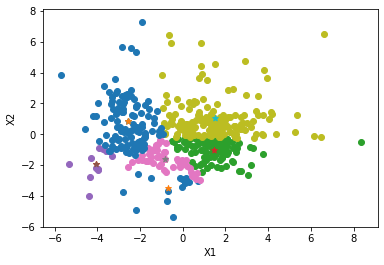

クラスタ6個、10回目の試行
初期値：[219, 262, 420, 205, 191, 259]
学習完了です。
SSE
935.5270832844186


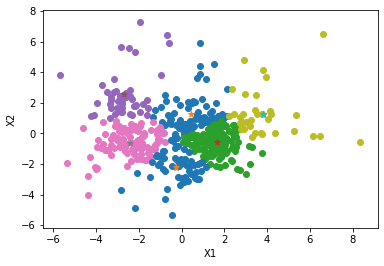

SSEが最小になる中心点:
[[-0.76427056 -1.95206999]
 [ 0.07900917  0.69237808]
 [ 1.79076079 -0.50963395]
 [ 3.94459201  1.35498249]
 [-0.39453518  4.95445622]
 [-2.85392285  0.45232824]]
SSE最小値:
863.1511649632668
クラスタ7個、1回目の試行
初期値：[67, 421, 72, 64, 105, 117, 377]
学習完了です。
SSE
904.7946345876906


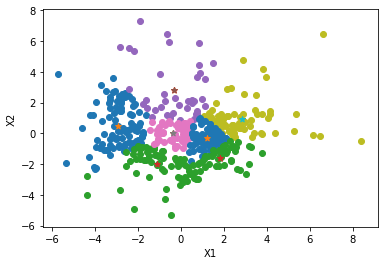

クラスタ7個、2回目の試行
初期値：[270, 261, 377, 361, 313, 293, 48]
学習完了です。
SSE
695.3468196469936


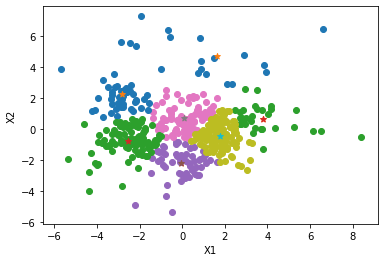

クラスタ7個、3回目の試行
初期値：[159, 62, 246, 263, 260, 110, 134]
学習完了です。
SSE
771.318464192573


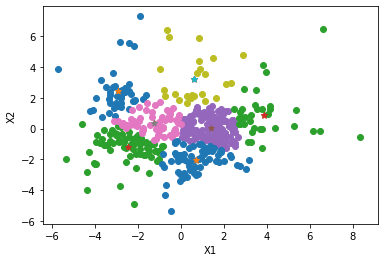

クラスタ7個、4回目の試行
初期値：[281, 164, 232, 82, 400, 367, 123]
学習完了です。
SSE
861.8879887478124


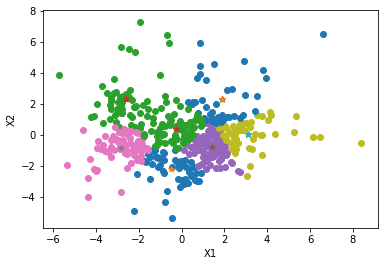

クラスタ7個、5回目の試行
初期値：[92, 400, 391, 195, 109, 102, 359]
学習完了です。
SSE
781.3099275645292


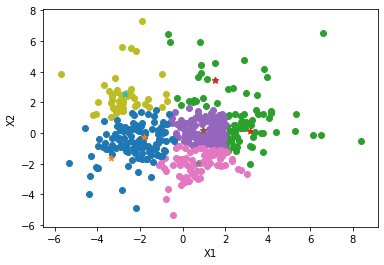

クラスタ7個、6回目の試行
初期値：[200, 254, 377, 46, 279, 256, 312]
学習完了です。
SSE
1326.6309118677573


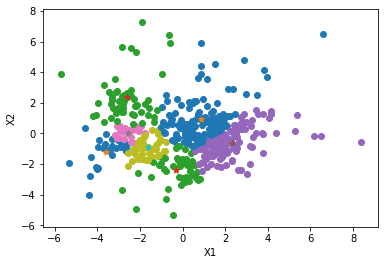

クラスタ7個、7回目の試行
初期値：[273, 295, 121, 337, 325, 367, 133]
学習完了です。
SSE
864.9011835843256


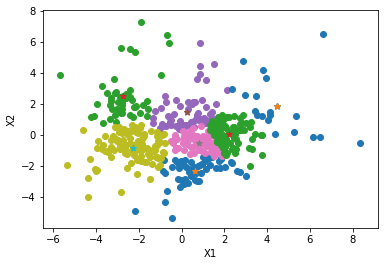

クラスタ7個、8回目の試行
初期値：[334, 397, 258, 250, 115, 378, 237]
学習完了です。
SSE
667.276811011586


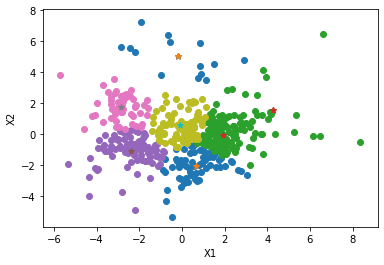

クラスタ7個、9回目の試行
初期値：[383, 430, 225, 281, 388, 84, 373]
学習完了です。
SSE
934.5540322594774


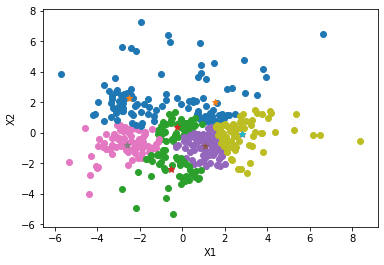

クラスタ7個、10回目の試行
初期値：[170, 206, 3, 74, 190, 136, 282]
学習完了です。
SSE
875.7865814943485


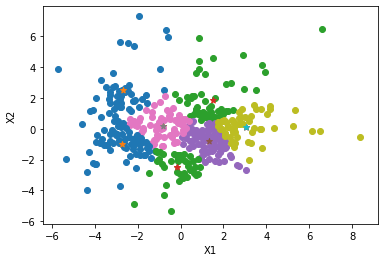

SSEが最小になる中心点:
[[ 0.68024051 -2.05196519]
 [ 1.91885901 -0.05131916]
 [-2.38480636 -1.07824314]
 [-2.86688555  1.73614258]
 [-0.07164344  0.56323526]
 [-0.19596647  5.05255655]
 [ 4.25936678  1.54864337]]
SSE最小値:
667.276811011586
クラスタ8個、1回目の試行
初期値：[20, 223, 219, 303, 320, 380, 290, 109]
学習完了です。
SSE
573.7885511634128


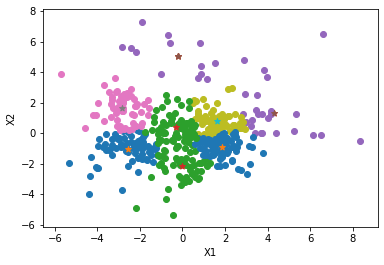

クラスタ8個、2回目の試行
初期値：[89, 147, 262, 209, 285, 333, 404, 207]
学習完了です。
SSE
796.1319936309918


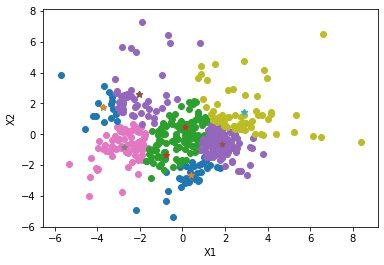

クラスタ8個、3回目の試行
初期値：[410, 155, 413, 162, 20, 322, 98, 342]
学習完了です。
SSE
698.5235374183172


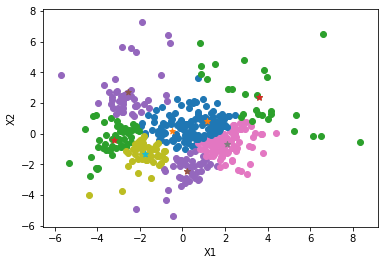

クラスタ8個、4回目の試行
初期値：[5, 101, 205, 236, 417, 73, 62, 265]
学習完了です。
SSE
1067.3096054431426


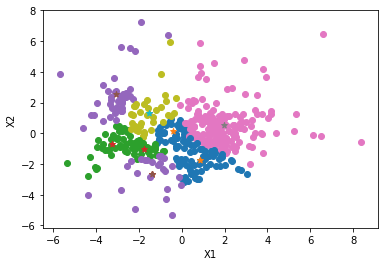

クラスタ8個、5回目の試行
初期値：[202, 250, 90, 21, 242, 159, 133, 185]
学習完了です。
SSE
618.7899237784306


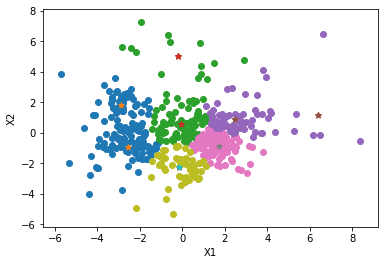

クラスタ8個、6回目の試行
初期値：[412, 285, 321, 250, 131, 258, 173, 338]
学習完了です。
SSE
617.9983712588713


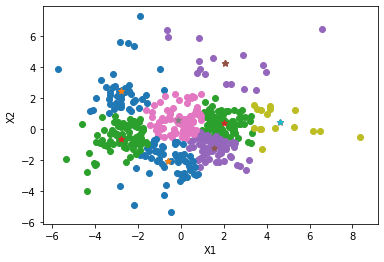

クラスタ8個、7回目の試行
初期値：[187, 162, 353, 220, 231, 213, 248, 56]
学習完了です。
SSE
727.9512763100859


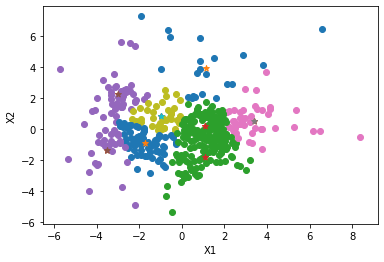

クラスタ8個、8回目の試行
初期値：[24, 260, 324, 291, 171, 289, 352, 345]
学習完了です。
SSE
694.833630913273


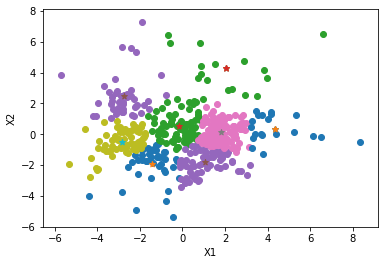

クラスタ8個、9回目の試行
初期値：[353, 375, 301, 278, 177, 431, 218, 398]
学習完了です。
SSE
1050.236170119817


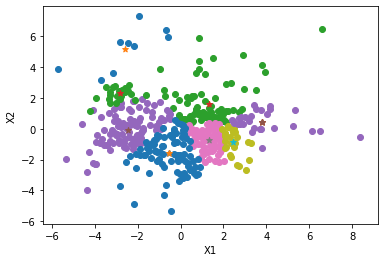

クラスタ8個、10回目の試行
初期値：[322, 347, 20, 29, 256, 253, 271, 408]
学習完了です。
SSE
828.8445031210306


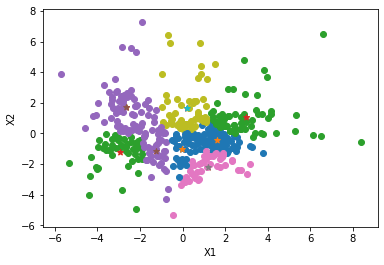

SSEが最小になる中心点:
[[-2.5423402  -1.05169783]
 [-0.03892224 -2.18053837]
 [ 4.2964425   1.29445826]
 [-2.84915092  1.62424024]
 [ 1.61546279  0.80645503]
 [ 1.84997173 -0.90462399]
 [-0.31794237  0.42653546]
 [-0.19596647  5.05255655]]
SSE最小値:
573.7885511634128


In [56]:
# 初期値
#n_clusters=3#クラスタ数
n_init=10#中心点の初期値を何回変えて計算するか
max_iter=50#1回の計算で最大何イテレーションするか
tol=0.01#イテレーションを終了する基準となる中心点と重心の許容誤差

# インスタンス化
KMeans_ws_k2 = ScratchKMeans(2, n_init, max_iter, tol)
KMeans_ws_k3 = ScratchKMeans(3, n_init, max_iter, tol)
KMeans_ws_k4 = ScratchKMeans(4, n_init, max_iter, tol)
KMeans_ws_k5 = ScratchKMeans(5, n_init, max_iter, tol)
KMeans_ws_k6 = ScratchKMeans(6, n_init, max_iter, tol)
KMeans_ws_k7 = ScratchKMeans(7, n_init, max_iter, tol)
KMeans_ws_k8 = ScratchKMeans(8, n_init, max_iter, tol)
KMeans_ws_k2.fit(data_pca)
KMeans_ws_k3.fit(data_pca)
KMeans_ws_k4.fit(data_pca)
KMeans_ws_k5.fit(data_pca)
KMeans_ws_k6.fit(data_pca)
KMeans_ws_k7.fit(data_pca)
KMeans_ws_k8.fit(data_pca)

# SSE値の抜き出し
sse_graph = [KMeans_ws_k2.best_sse, 
            KMeans_ws_k3.best_sse, 
            KMeans_ws_k4.best_sse, 
            KMeans_ws_k5.best_sse, 
            KMeans_ws_k6.best_sse, 
            KMeans_ws_k7.best_sse, 
            KMeans_ws_k8.best_sse
            ]

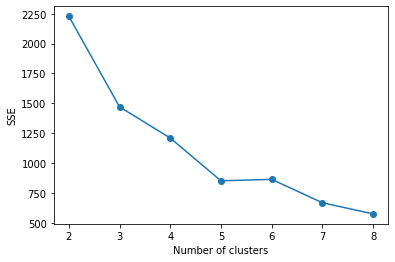

In [57]:
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
x = np.arange(2, 9)
plt.plot(x, sse_graph, marker="o")

## 【問題10】クラスタ数kの選択  
>最適だと思われるクラスタ数 $k$ を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。






エルボー図を見たところ、クラスタ数５のところから折れ曲がっているように  
見受けられるため、クラスタ数は５が最適と考えられる。  
このデータラベルは地域３つ（Lisbon 77、Oporto 47、Other Region 316）と  
販売チャネル２種類（食品サービス業界 298、小売り 142） の　３×２＝６個であるが、  
このデータの傾向として、５分類で整理することが最適と考えられるため、  
例えば、地域については、もしLisbon 、Oporto に相関性があるのであれば  
「都心部」と「その他」などと言ったように２つのグループにし、残りは「その他」でまとめるなど  
2×２（プラス１）のような形でもっと整理して扱う方が好ましいのではないかと思われる。

## 【問題11】既知のグループとの比較  
>RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。


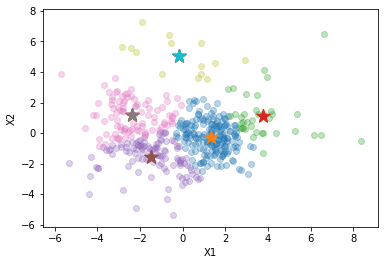

In [58]:
# ベストな図 K＝5
plt.xlabel('X1')
plt.ylabel('X2')
for p in range(KMeans_ws_k5.n_clusters):
    index = np.where(KMeans_ws_k5.best_label_list == p)[0]
    plt.scatter(data_pca[index, 0], data_pca[index, 1], alpha=0.3)
    plt.scatter(KMeans_ws_k5.best_center_point[p:, 0], KMeans_ws_k5.best_center_point[p:, 1], marker = "*", s=200)
plt.show()

[1 2 3]


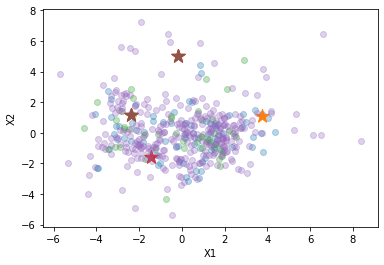

In [59]:
# Region　による分類

region_labels = np.unique(df_label['Region'])
print(region_labels)

plt.xlabel('X1')
plt.ylabel('X2')
for p in region_labels:
    index = np.where(df_label['Region'] == p)[0]
    plt.scatter(data_pca[index, 0], data_pca[index, 1], alpha=0.3)
    plt.scatter(KMeans_ws_k5.best_center_point[p:, 0], KMeans_ws_k5.best_center_point[p:, 1], marker = "*", s=200)
plt.show()

[1 2]


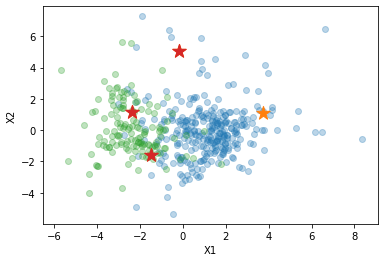

In [61]:
# Channel　による分類

channel_labels = np.unique(df_label['Channel'])
print(channel_labels)

plt.xlabel('X1')
plt.ylabel('X2')
for p in channel_labels:
    index = np.where(df_label['Channel'] == p)[0]
    plt.scatter(data_pca[index, 0], data_pca[index, 1], alpha=0.3)
    plt.scatter(KMeans_ws_k5.best_center_point[p:, 0], KMeans_ws_k5.best_center_point[p:, 1], marker = "*", s=200)
plt.show()

RegionとChannelそれぞれでラベルごとに色を分けて可視化したところ、  
Regionについてはクラスタ分類とはほとんど一致しなかったが、  
Channelについてはクラスタ分類と一致していた。  
売り上げを伸ばす戦略を考えるなら、地域に差はないため、チャンネルごとに  
戦略を考えると良いのではないだろうか。

## 【問題12】卸売業者にとって有益な情報  
>卸売業者にとって有益な情報を探し出し文章にまとめてください。
>
>《ヒント》
>
>前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。
>
>条件ごとにデータを見る際にはPandasのgroupbyが便利です。
>
>pandas.DataFrame.groupby — pandas 0.23.4 documentation

In [62]:
print("特徴量の平均値、標準偏差、四分位数")
display(df_label.describe())

特徴量の平均値、標準偏差、四分位数


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### 特徴量６個で学習させる

エルボー図の描画

In [66]:
X_ws = np.array(df)

クラスタ2個、1回目の試行
初期値：[199, 114]
学習完了です。
SSE
267979507102.8568


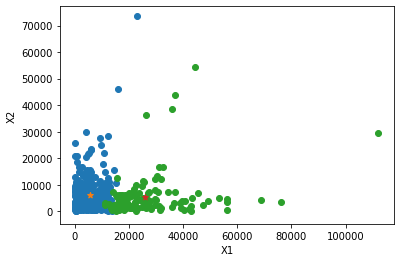

クラスタ2個、2回目の試行
初期値：[407, 328]
学習完了です。
SSE
245831277283.69656


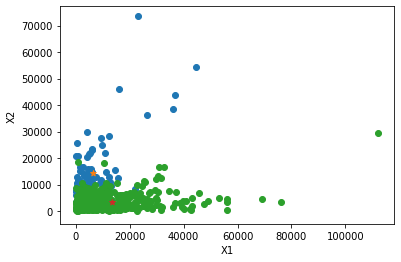

クラスタ2個、3回目の試行
初期値：[92, 363]
学習完了です。
SSE
194677697701.9275


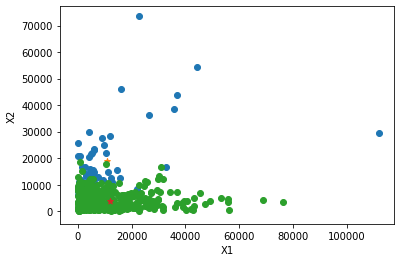

クラスタ2個、4回目の試行
初期値：[55, 48]
学習完了です。
SSE
179252942219.38156


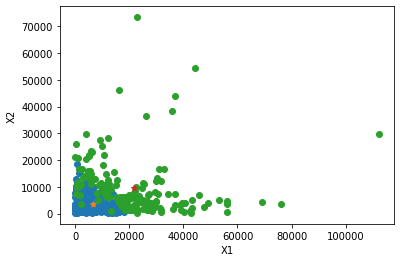

クラスタ2個、5回目の試行
初期値：[277, 193]
学習完了です。
SSE
238847988370.01343


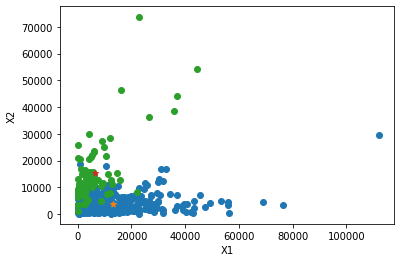

クラスタ2個、6回目の試行
初期値：[124, 263]
学習完了です。
SSE
239601956530.04953


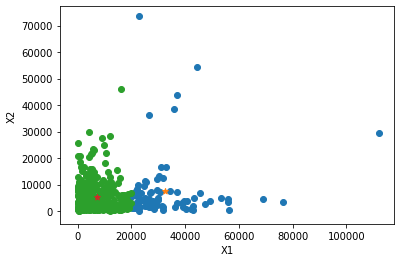

クラスタ2個、7回目の試行
初期値：[373, 387]
学習完了です。
SSE
273344653149.4537


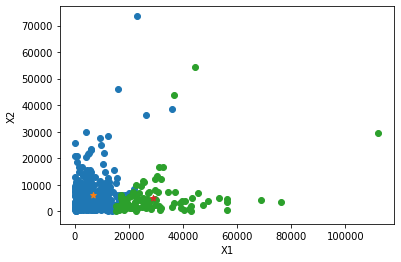

クラスタ2個、8回目の試行
初期値：[89, 400]
学習完了です。
SSE
236260655055.78314


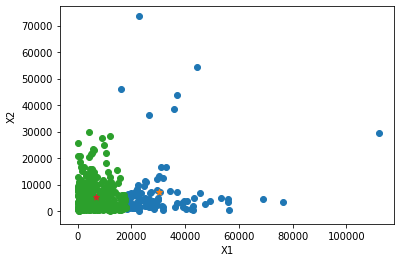

クラスタ2個、9回目の試行
初期値：[38, 407]
学習完了です。
SSE
245758524923.07047


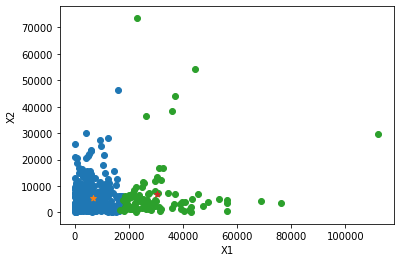

クラスタ2個、10回目の試行
初期値：[123, 31]
学習完了です。
SSE
189757694799.0


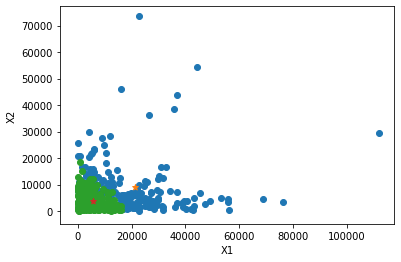

SSEが最小になる中心点:
[[ 6453.96415771  3634.14336918  5034.55555556  2513.68100358
   1708.00716846  1042.14336918]
 [21611.64596273  9543.04968944 13005.72049689  4039.33540373
   4915.04968944  2361.39751553]]
SSE最小値:
179252942219.38156
クラスタ3個、1回目の試行
初期値：[372, 359, 288]
学習完了です。
SSE
208252730791.52722


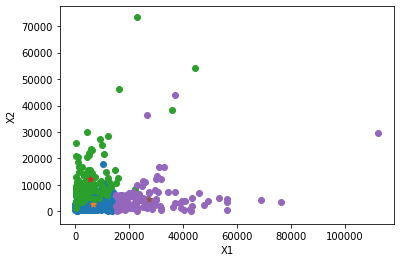

クラスタ3個、2回目の試行
初期値：[100, 273, 308]
学習完了です。
SSE
171141397866.2098


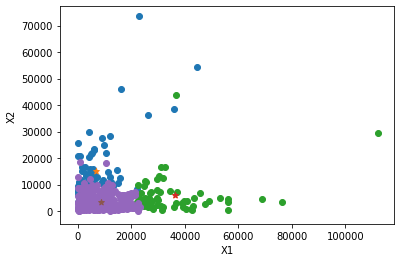

クラスタ3個、3回目の試行
初期値：[300, 38, 93]
学習完了です。
SSE
252999030899.30936


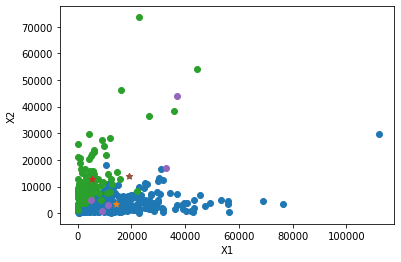

クラスタ3個、4回目の試行
初期値：[316, 381, 276]
学習完了です。
SSE
190288849946.24698


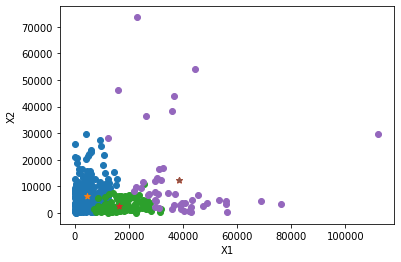

クラスタ3個、5回目の試行
初期値：[1, 16, 184]
学習完了です。
SSE
219793128840.4166


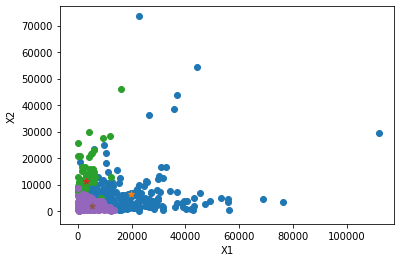

クラスタ3個、6回目の試行
初期値：[263, 337, 321]
学習完了です。
SSE
171141397866.2098


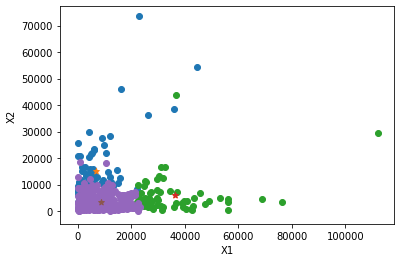

クラスタ3個、7回目の試行
初期値：[60, 185, 31]
学習完了です。
SSE
226322214197.48972


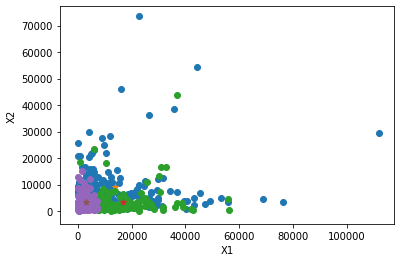

クラスタ3個、8回目の試行
初期値：[140, 82, 414]
学習完了です。
SSE
193891521522.24854


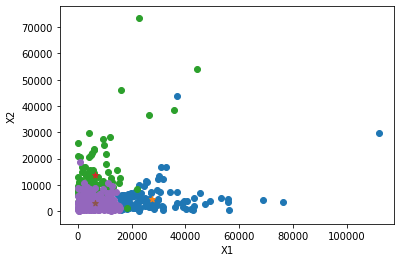

クラスタ3個、9回目の試行
初期値：[394, 3, 431]
学習完了です。
SSE
168512393373.92642


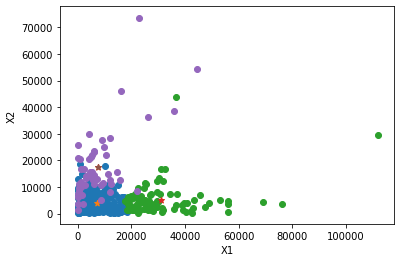

クラスタ3個、10回目の試行
初期値：[355, 341, 22]
学習完了です。
SSE
184370128585.7525


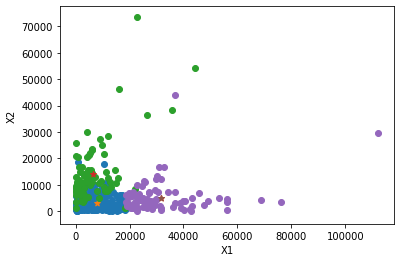

SSEが最小になる中心点:
[[ 7215.70608108  3819.47635135  5029.2027027   2494.55067568
   1708.31081081  1070.5777027 ]
 [30927.77272727  5064.07954545  5979.46590909  5727.26136364
   1138.90909091  2655.86363636]
 [ 7547.10714286 17395.58928571 26495.08928571  1951.14285714
  11820.94642857  2148.85714286]]
SSE最小値:
168512393373.92642
クラスタ4個、1回目の試行
初期値：[349, 378, 348, 55]
学習完了です。
SSE
176057911602.57144


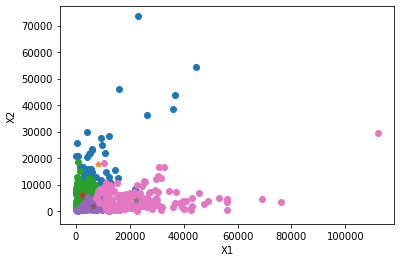

クラスタ4個、2回目の試行
初期値：[271, 88, 386, 19]
学習完了です。
SSE
178536623591.23383


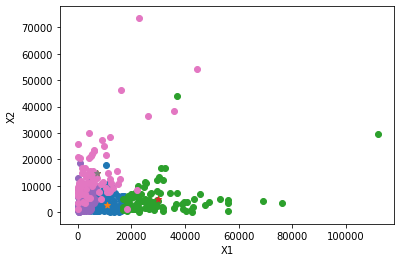

クラスタ4個、3回目の試行
初期値：[268, 401, 295, 170]
学習完了です。
SSE
132654320973.86638


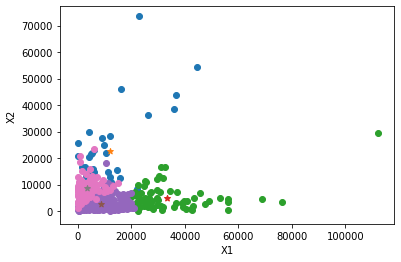

クラスタ4個、4回目の試行
初期値：[275, 108, 239, 6]
学習完了です。
SSE
201639719450.92484


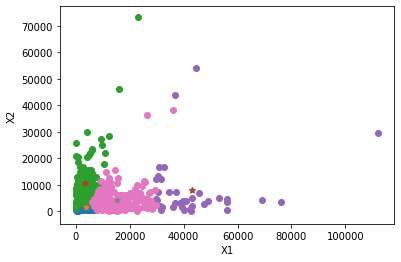

クラスタ4個、5回目の試行
初期値：[222, 437, 201, 239]
学習完了です。
SSE
99121431838.1802


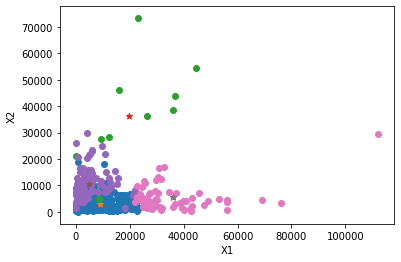

クラスタ4個、6回目の試行
初期値：[237, 323, 233, 141]
学習完了です。
SSE
175982675869.09778


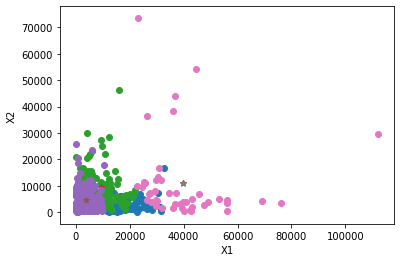

クラスタ4個、7回目の試行
初期値：[182, 278, 417, 259]
学習完了です。
SSE
148841517829.16888


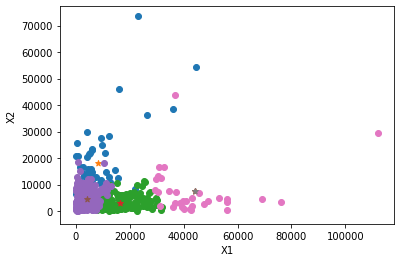

クラスタ4個、8回目の試行
初期値：[30, 337, 130, 50]
学習完了です。
SSE
156383479298.09915


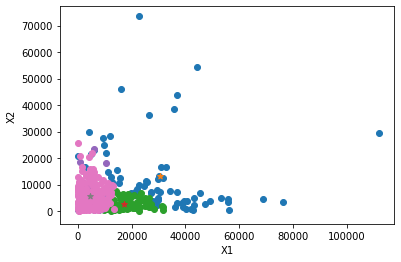

クラスタ4個、9回目の試行
初期値：[265, 94, 96, 151]
学習完了です。
SSE
116707701832.52623


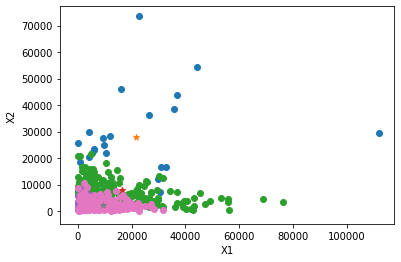

クラスタ4個、10回目の試行
初期値：[353, 308, 1, 378]
学習完了です。
SSE
199096824471.6184


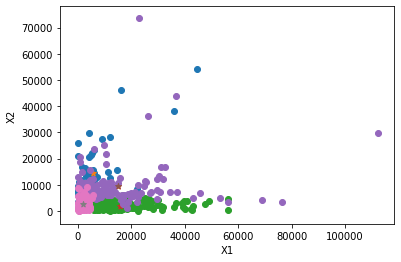

SSEが最小になる中心点:
[[ 9050.48028674  3073.83512545  3819.9390681   2798.86379928
   1034.33691756  1052.5483871 ]
 [19888.27272727 36142.36363636 45517.45454545  6328.90909091
  21417.09090909  8414.        ]
 [ 4781.47826087 10628.76086957 17137.35869565  1476.38043478
   7412.79347826  1634.32608696]
 [36144.48275862  5471.46551724  6128.79310345  6298.65517241
   1064.          2316.72413793]]
SSE最小値:
99121431838.1802
クラスタ5個、1回目の試行
初期値：[327, 120, 257, 49, 32]
学習完了です。
SSE
147572212805.71832


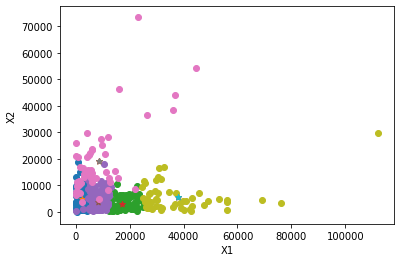

クラスタ5個、2回目の試行
初期値：[164, 145, 409, 103, 259]
学習完了です。
SSE
77795318314.0675


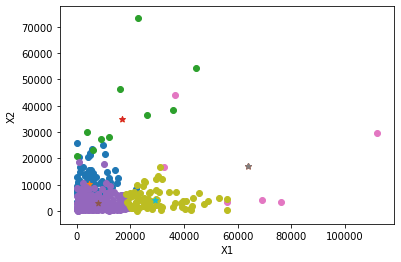

クラスタ5個、3回目の試行
初期値：[418, 348, 388, 238, 403]
学習完了です。
SSE
179151450030.23032


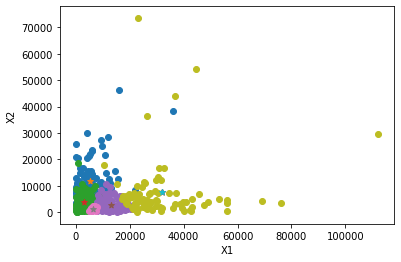

クラスタ5個、4回目の試行
初期値：[368, 328, 245, 46, 272]
学習完了です。
SSE
173469121984.23526


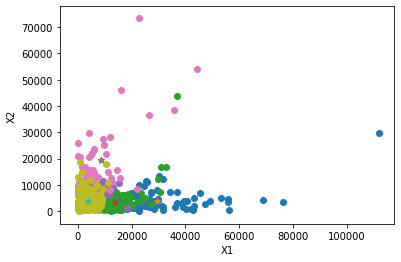

クラスタ5個、5回目の試行
初期値：[2, 266, 30, 282, 236]
学習完了です。
SSE
135751675283.46072


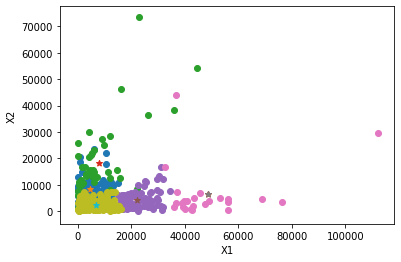

クラスタ5個、6回目の試行
初期値：[60, 71, 221, 327, 1]
学習完了です。
SSE
117643505587.81833


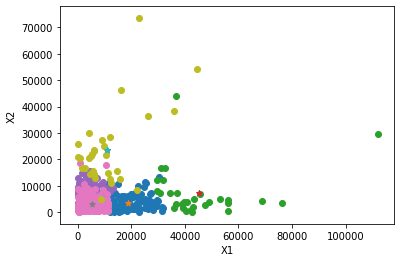

クラスタ5個、7回目の試行
初期値：[209, 227, 376, 145, 263]
学習完了です。
SSE
124237086610.45134


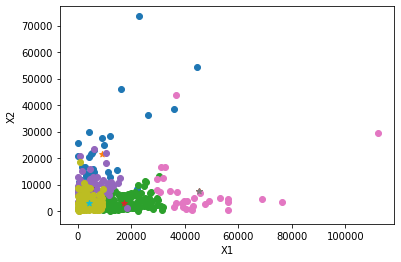

クラスタ5個、8回目の試行
初期値：[377, 192, 376, 90, 229]
学習完了です。
SSE
188446072816.39612


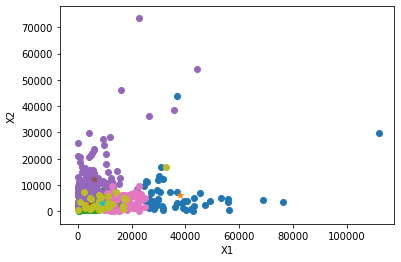

クラスタ5個、9回目の試行
初期値：[285, 66, 409, 426, 314]
学習完了です。
SSE
161306192359.54657


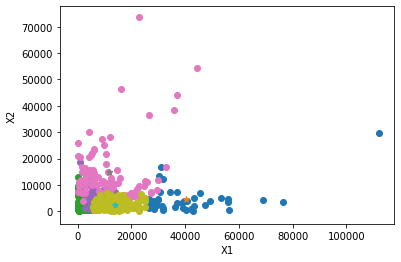

クラスタ5個、10回目の試行
初期値：[168, 384, 77, 14, 311]
学習完了です。
SSE
100135511873.32748


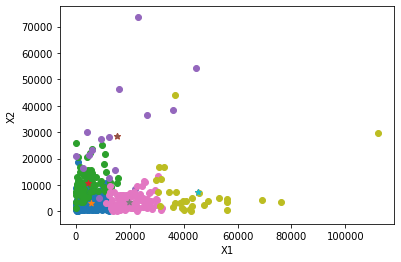

SSEが最小になる中心点:
[[ 4770.1875     10255.8125     16609.42708333  1426.04166667
   7111.39583333  1631.98958333]
 [16911.09090909 34864.36363636 46126.18181818  3245.45454545
  23008.09090909  4177.36363636]
 [ 8116.95238095  2990.6031746   3589.81349206  2849.51984127
    945.20238095  1012.28968254]
 [63830.83333333 16958.16666667 13426.83333333 26234.33333333
   1578.         11320.66666667]
 [29436.18666667  4358.8         5486.33333333  4047.53333333
   1125.53333333  1937.33333333]]
SSE最小値:
77795318314.0675
クラスタ6個、1回目の試行
初期値：[39, 419, 340, 270, 78, 265]
学習完了です。
SSE
93658595801.47528


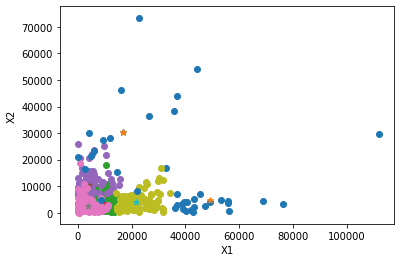

クラスタ6個、2回目の試行
初期値：[436, 369, 250, 168, 123, 128]
学習完了です。
SSE
180130940649.4512


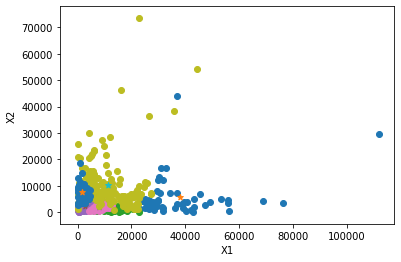

クラスタ6個、3回目の試行
初期値：[11, 386, 265, 80, 217, 222]
学習完了です。
SSE
141868601075.17987


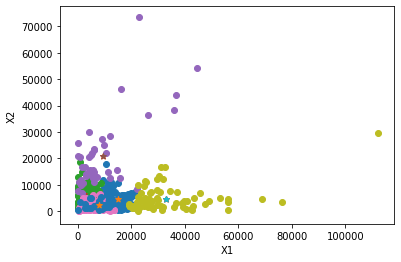

クラスタ6個、4回目の試行
初期値：[206, 127, 355, 424, 156, 92]
学習完了です。
SSE
97695513401.474


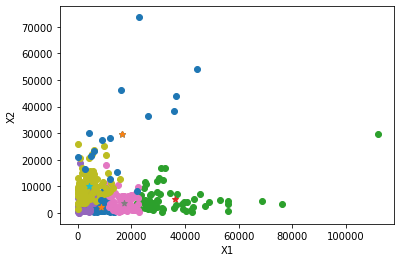

クラスタ6個、5回目の試行
初期値：[404, 315, 120, 285, 196, 75]
学習完了です。
SSE
189705647474.7156


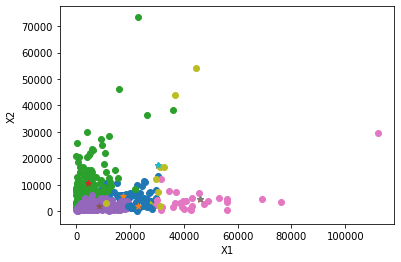

クラスタ6個、6回目の試行
初期値：[391, 184, 222, 73, 115, 274]
学習完了です。
SSE
163964326228.9807


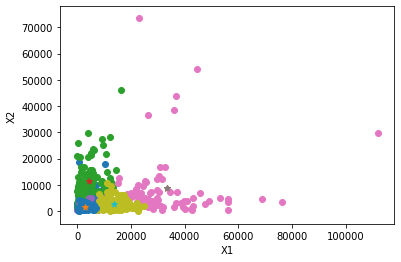

クラスタ6個、7回目の試行
初期値：[121, 245, 178, 207, 393, 133]
学習完了です。
SSE
180814743300.42148


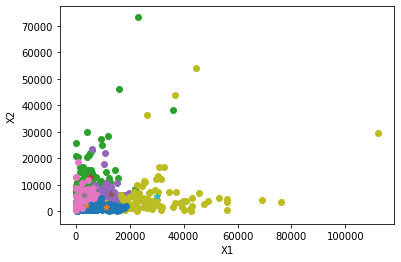

クラスタ6個、8回目の試行
初期値：[43, 279, 160, 100, 94, 147]
学習完了です。
SSE
137772318385.64435


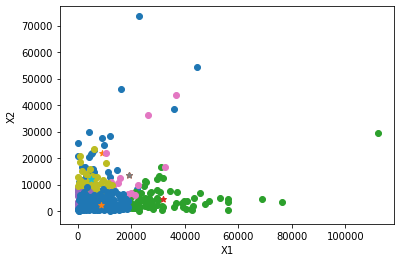

クラスタ6個、9回目の試行
初期値：[108, 67, 428, 179, 92, 260]
学習完了です。
SSE
104564731699.965


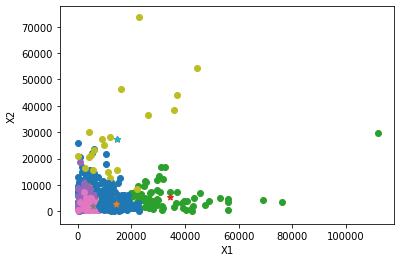

クラスタ6個、10回目の試行
初期値：[386, 437, 262, 273, 392, 402]
学習完了です。
SSE
131927043917.7328


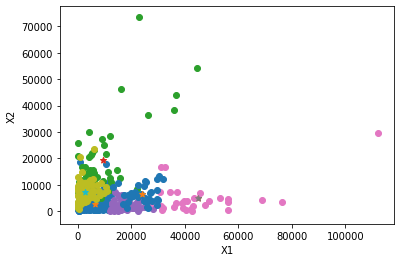

SSEが最小になる中心点:
[[49296.08695652  4983.7826087   5590.30434783  8285.7826087
    962.26086957  2543.69565217]
 [ 9761.02150538  3844.4516129   4885.74193548  1904.1827957
   1441.15053763  1207.69892473]
 [ 4081.45882353 10292.51764706 16274.71764706  1434.28235294
   7046.84705882  1465.07058824]
 [ 3858.89430894  2618.57723577  2892.36585366  3229.69918699
    739.55284553   850.77235772]
 [21500.4         3919.06        5184.99        3901.31
   1141.          1689.18      ]
 [16683.625      30583.8125     41125.          4668.125
  19228.1875      6376.75      ]]
SSE最小値:
93658595801.47528
クラスタ7個、1回目の試行
初期値：[415, 353, 324, 64, 310, 245, 335]
学習完了です。
SSE
135302055662.47607


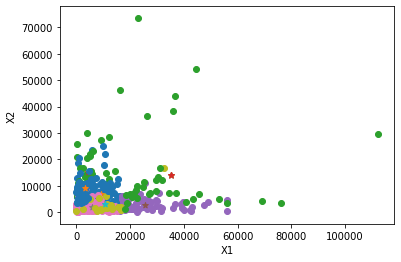

クラスタ7個、2回目の試行
初期値：[304, 17, 158, 408, 174, 225, 405]
学習完了です。
SSE
184930040622.18936


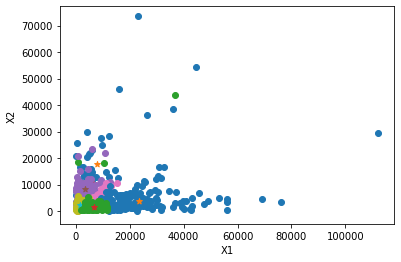

クラスタ7個、3回目の試行
初期値：[271, 47, 22, 364, 385, 411, 124]
学習完了です。
SSE
73129085677.43526


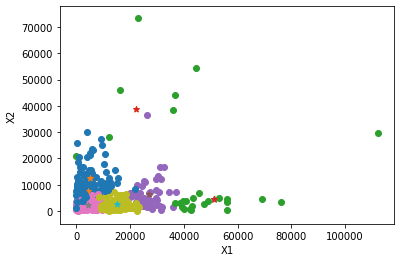

クラスタ7個、4回目の試行
初期値：[403, 305, 302, 358, 277, 8, 401]
学習完了です。
SSE
106996818897.85873


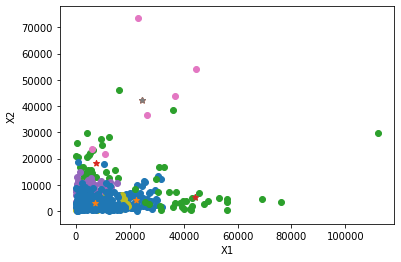

クラスタ7個、5回目の試行
初期値：[309, 272, 371, 97, 162, 193, 397]
学習完了です。
SSE
145359145031.0948


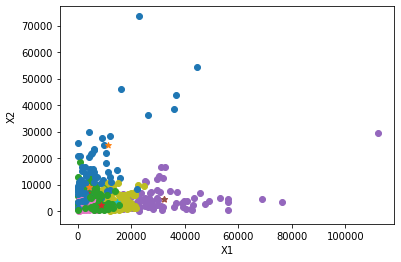

クラスタ7個、6回目の試行
初期値：[123, 103, 334, 211, 140, 362, 94]
学習完了です。
SSE
86990663724.71031


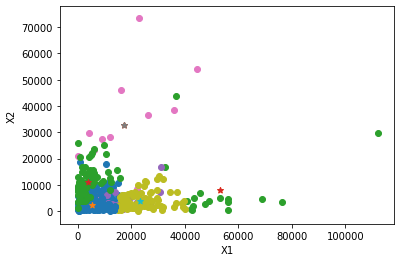

クラスタ7個、7回目の試行
初期値：[39, 391, 344, 436, 154, 118, 109]
学習完了です。
SSE
134813724898.7135


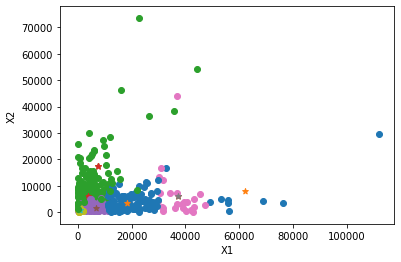

クラスタ7個、8回目の試行
初期値：[248, 430, 264, 125, 119, 431, 291]
学習完了です。
SSE
177134714656.52762


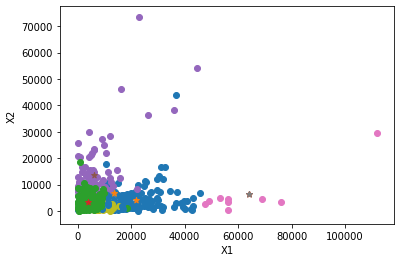

クラスタ7個、9回目の試行
初期値：[88, 62, 282, 312, 426, 28, 415]
学習完了です。
SSE
77303813874.60751


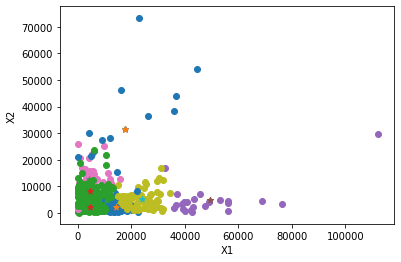

クラスタ7個、10回目の試行
初期値：[76, 374, 25, 291, 2, 144, 365]
学習完了です。
SSE
184535542628.99445


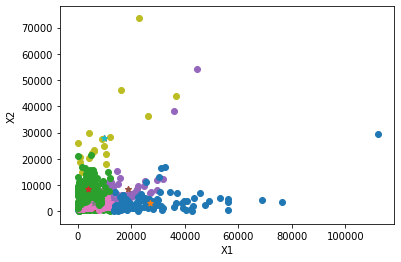

SSEが最小になる中心点:
[[ 4437.28767123  7453.98630137  9143.1369863   1616.53424658
   3794.39726027  1363.45205479]
 [22133.25       38817.25       51631.625       6810.75
  24218.875       8222.5       ]
 [27029.17777778  6609.95555556  7818.84444444  5978.86666667
   1498.84444444  2677.31111111]
 [ 4510.79674797  2152.32520325  2634.97560976  2330.97560976
    613.4796748    842.34146341]
 [15050.54054054  2528.56756757  3571.98198198  3632.37837838
    768.27027027  1135.88288288]
 [ 5156.41666667 12729.56666667 20698.05        1638.03333333
   9143.18333333  1736.48333333]
 [51400.35        4452.45        5186.85        6096.1
   1017.          2563.6       ]]
SSE最小値:
73129085677.43526
クラスタ8個、1回目の試行
初期値：[113, 389, 340, 291, 144, 191, 321, 176]
学習完了です。
SSE
153346821416.68826


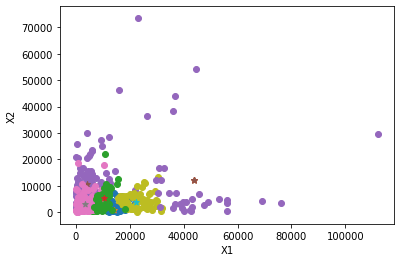

クラスタ8個、2回目の試行
初期値：[78, 262, 322, 228, 401, 130, 150, 220]
学習完了です。
SSE
105995616396.54436


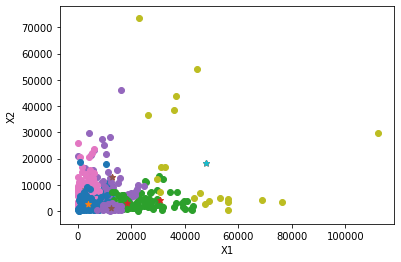

クラスタ8個、3回目の試行
初期値：[104, 346, 159, 95, 97, 14, 79, 90]
学習完了です。
SSE
156434187585.88477


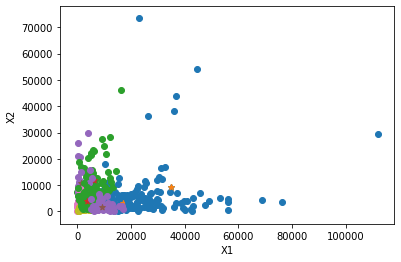

クラスタ8個、4回目の試行
初期値：[352, 139, 262, 378, 35, 175, 375, 227]
学習完了です。
SSE
196066951872.89014


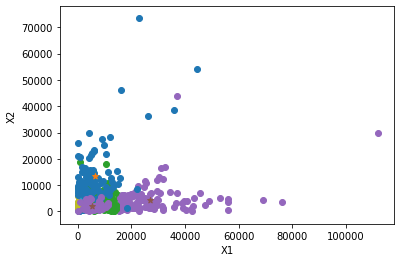

クラスタ8個、5回目の試行
初期値：[224, 403, 45, 277, 391, 352, 154, 125]
学習完了です。
SSE
138214593894.90018


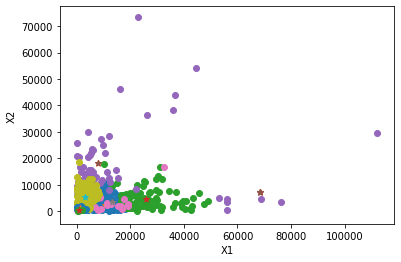

クラスタ8個、6回目の試行
初期値：[77, 6, 377, 399, 337, 429, 227, 309]
学習完了です。
SSE
140847788130.04892


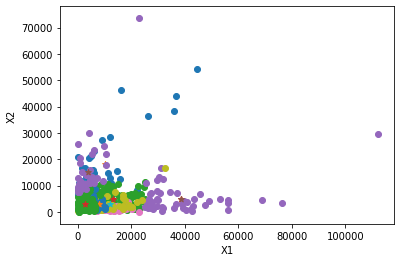

クラスタ8個、7回目の試行
初期値：[258, 58, 362, 294, 20, 437, 219, 265]
学習完了です。
SSE
111064963005.05774


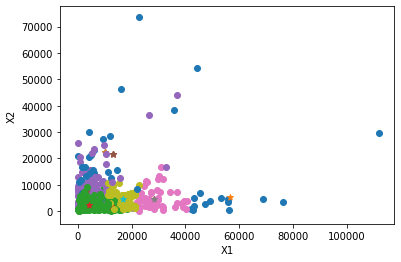

クラスタ8個、8回目の試行
初期値：[298, 175, 369, 328, 338, 416, 223, 244]
学習完了です。
SSE
175238589972.99872


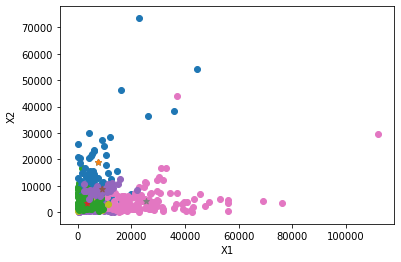

クラスタ8個、9回目の試行
初期値：[197, 119, 45, 285, 228, 399, 360, 192]
学習完了です。
SSE
126961023483.59326


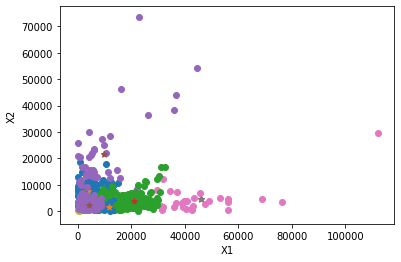

クラスタ8個、10回目の試行
初期値：[251, 45, 346, 356, 381, 141, 316, 387]
学習完了です。
SSE
98866222725.30983


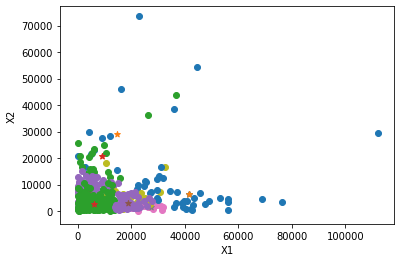

SSEが最小になる中心点:
[[14551.28571429 29212.         43986.5         2357.28571429
  21648.21428571  2683.        ]
 [ 9117.88888889 20633.22222222 21377.22222222  4357.94444444
   7399.05555556  5613.55555556]
 [ 4130.55172414  7997.27586207 13978.62068966  1261.45977011
   6136.59770115  1513.1954023 ]
 [27301.18181818  1509.36363636  2665.45454545  3253.81818182
    481.09090909  1180.81818182]
 [17708.62068966  4729.06896552  3996.27586207 12844.48275862
    603.93103448  1919.79310345]
 [41670.44444444  6456.41666667  7072.77777778  5053.75
   1330.5         2469.05555556]
 [ 6114.77419355  2761.54301075  3259.80645161  2281.82795699
    834.82795699   891.49462366]
 [18670.94915254  2956.          4672.28813559  1963.06779661
   1215.81355932  1310.54237288]]
SSE最小値:
98866222725.30983


In [89]:
# 初期値
#n_clusters=3#クラスタ数
n_init=10#中心点の初期値を何回変えて計算するか
max_iter=50#1回の計算で最大何イテレーションするか
tol=0.01#イテレーションを終了する基準となる中心点と重心の許容誤差

# インスタンス化
KMeans_ws2_k2 = ScratchKMeans(2, n_init, max_iter, tol)
KMeans_ws2_k3 = ScratchKMeans(3, n_init, max_iter, tol)
KMeans_ws2_k4 = ScratchKMeans(4, n_init, max_iter, tol)
KMeans_ws2_k5 = ScratchKMeans(5, n_init, max_iter, tol)
KMeans_ws2_k6 = ScratchKMeans(6, n_init, max_iter, tol)
KMeans_ws2_k7 = ScratchKMeans(7, n_init, max_iter, tol)
KMeans_ws2_k8 = ScratchKMeans(8, n_init, max_iter, tol)
KMeans_ws2_k2.fit(X_ws)
KMeans_ws2_k3.fit(X_ws)
KMeans_ws2_k4.fit(X_ws)
KMeans_ws2_k5.fit(X_ws)
KMeans_ws2_k6.fit(X_ws)
KMeans_ws2_k7.fit(X_ws)
KMeans_ws2_k8.fit(X_ws)

# SSE値の抜き出し
sse_graph = [KMeans_ws2_k2.best_sse, 
            KMeans_ws2_k3.best_sse, 
            KMeans_ws2_k4.best_sse, 
            KMeans_ws2_k5.best_sse, 
            KMeans_ws2_k6.best_sse, 
            KMeans_ws2_k7.best_sse, 
            KMeans_ws2_k8.best_sse
            ]

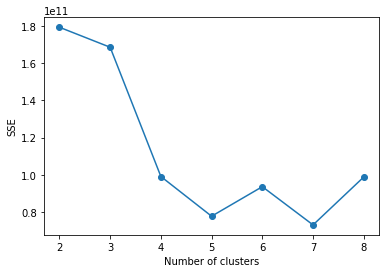

In [90]:
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
x = np.arange(2, 9)
plt.plot(x, sse_graph, marker="o")

最良とされたクラスタ５で特徴量ごとに可視化を行う。

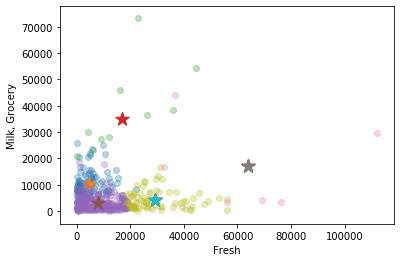

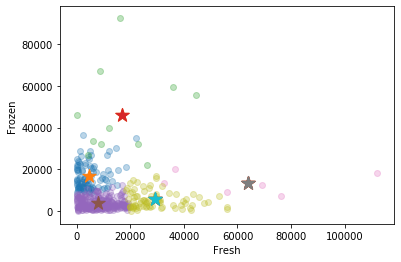

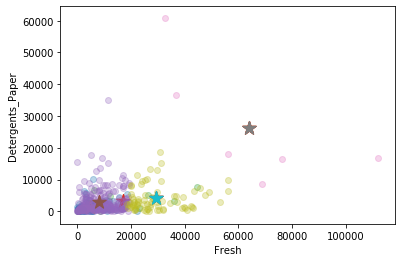

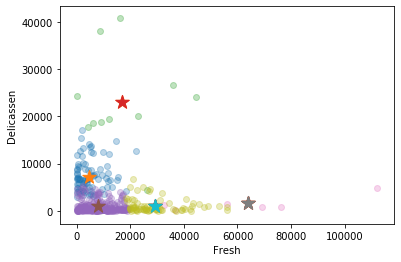

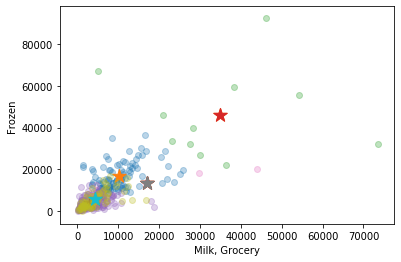

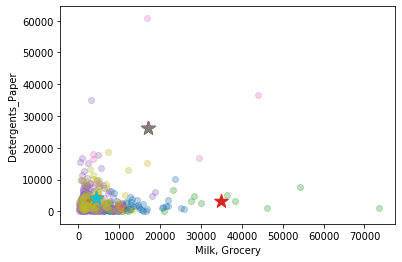

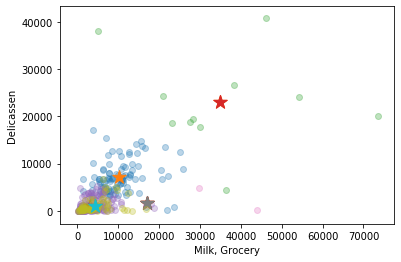

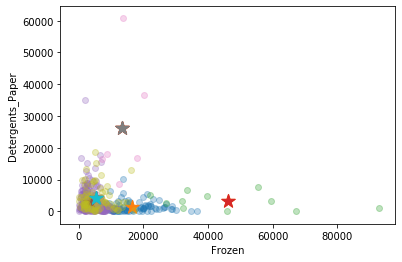

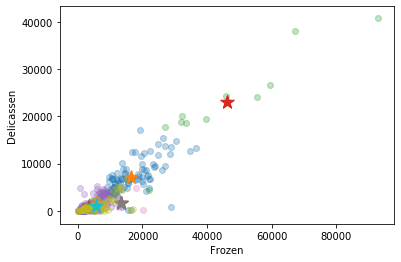

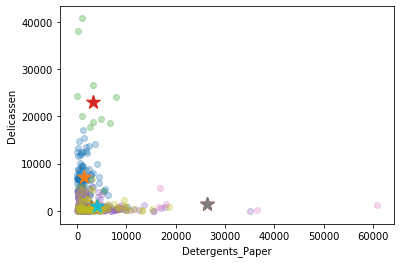

In [91]:
# ベストな図 K＝5

feature = ['Fresh', 'Milk, Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for f1 in range(X_ws.shape[1]-1):
    for f2 in range(X_ws.shape[1]-1):
        for p in range(KMeans_ws2_k5.n_clusters):
            if f1 < f2:
                index = np.where(KMeans_ws2_k5.best_label_list == p)[0]
                plt.xlabel(feature[f1])
                plt.ylabel(feature[f2])
                plt.scatter(X_ws[index, f1], X_ws[index, f2], alpha=0.3)
                plt.scatter(KMeans_ws2_k5.best_center_point[p:, f1], KMeans_ws2_k5.best_center_point[p:, f2], marker = "*", s=200)
        plt.show()

特徴量を抜き出して２次元で可視化したところ、全体的にうまく分類された。

KMeansによって新たに作成された分類を特徴量へ追加して、新たな分類によって  
データ全体の特徴がどのように見えてくるか確認していく。

In [92]:
df_1 = pd.DataFrame(KMeans_ws2_k5.best_label_list, columns=['KMeans'])
df_kmeans = pd.concat([df_1, df_label], axis=1)
display(df_kmeans)

,KMeans,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,2,3,12669,9656,7561,214,2674,1338
1,0,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,2,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,4,1,3,29703,12051,16027,13135,182,2204
436,4,1,3,39228,1431,764,4510,93,2346
437,0,2,3,14531,15488,30243,437,14841,1867
438,2,1,3,10290,1981,2232,1038,168,2125


In [93]:
#df_kmeans.groupby(['KMeans', 'Channel', 'Region']).mean()

In [94]:
df_kmeans.groupby(['KMeans']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
KMeans,,,,,,,,
0,1.864583,2.541667,4770.187500,10255.812500,16609.427083,1426.041667,7111.395833,1631.989583
1,2.000000,2.545455,16911.090909,34864.363636,46126.181818,3245.454545,23008.090909,4177.363636
2,1.134921,2.523810,8116.952381,2990.603175,3589.813492,2849.519841,945.202381,1012.289683
3,1.000000,2.833333,63830.833333,16958.166667,13426.833333,26234.333333,1578.000000,11320.666667
4,1.186667,2.586667,29436.186667,4358.800000,5486.333333,4047.533333,1125.533333,1937.333333


可視化

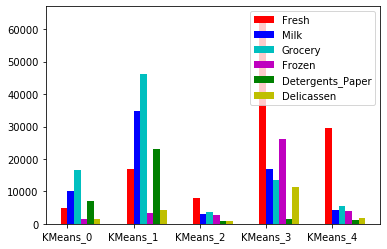

In [95]:
df_groupby = df_kmeans.groupby(['KMeans']).mean()

height1 = df_groupby['Fresh']
height2 = df_groupby['Milk']
height3 = df_groupby['Grocery']
height4 = df_groupby['Frozen']
height5 = df_groupby['Detergents_Paper']
height6 = df_groupby['Delicassen']

left = np.arange(5)
labels = ['KMeans_0', 'KMeans_1', 'KMeans_2', 'KMeans_3', 'KMeans_4']

width = 0.1

plt.bar(left, height1, color='r', width=width, label = 'Fresh')# 　生鮮食品
plt.bar(left+width, height2, color='b', width=width, label = 'Milk')#　乳製品
plt.bar(left+width*2, height3, color='c', width=width, label = 'Grocery')#　食料品
plt.bar(left+width*3, height4, color='m', width=width, label = 'Frozen')#　冷凍
plt.bar(left+width*4, height5, color='g', width=width, label = 'Detergents_Paper')#　洗剤
plt.bar(left+width*5, height6, color='y', width=width, label = 'Delicassen')#　デリカ

plt.xticks(left + width/2, labels)
plt.legend()
plt.show()

KMeansにより作成された分類を可視化したところ、以下のような特徴がみられた。  

KMeans_0は乳製品、食料品がやや多いグループ。  
KMeans_1は乳製品、食料品が多いグループ。  
KMeans_2は3や4と近いが特に特徴がないグループ。  
KMeans_3は生鮮食品が多いグループ。  
KMeans_4は生鮮食品がやや多いグループ。  

KMeans_0とKMeans_1、KMeans_3とKMeans_4は、量の大小は違うが  
それぞれ分布の特徴が似ているように思われる。

In [98]:
channel = []
for i in range(2):
    c_tmp = []
    for j in range(5):
        count = len(df_kmeans[(df_kmeans['KMeans'] == j) & ~(df_kmeans['Channel'] == i+1)])
        c_tmp.append(count)
    channel.append(c_tmp)

region = []
for i in range(3):
    r_tmp = []
    for j in range(5):
        count = len(df_kmeans[(df_kmeans['KMeans'] == j) & ~(df_kmeans['Region'] == i+1)])
        r_tmp.append(count)
    region.append(r_tmp)

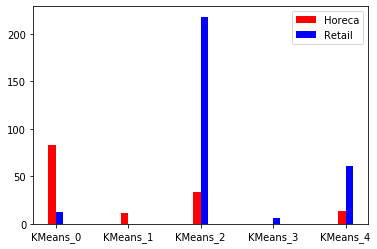

In [99]:
df_groupby = df_kmeans.groupby(['KMeans']).mean()

height1 = channel[0]
height2 = channel[1]

left = np.arange(5)
labels = ['KMeans_0', 'KMeans_1', 'KMeans_2', 'KMeans_3', 'KMeans_4']

width = 0.1

plt.bar(left, height1, color='r', width=width, label = 'Horeca')#食品サービス
plt.bar(left+width, height2, color='b', width=width, label = 'Retail')#小売

plt.xticks(left + width/2, labels)
plt.legend()
plt.show()

また、元々のラベルであるChannelとRegionとも関連性があるように思われる。   
乳製品、食料品が高かったKMeans_0とKMeans_1の組みは、両方とも食品サービスが多いカテゴリであり、  
生鮮食品が高かったKMeans_3とKMeans_4の組みは、両方とも小売が多いカテゴリであった。  
また、3や4に似ているが強い特徴がみられなかったKMeans_3についても小売が多かった。

まとめると以下の通り。
- KMeans_0
    - 乳製品、食料品がやや多い
    - 食品サービス業界
- KMeans_1
    - 乳製品、食料品が多い
    - 食品サービス業界
- KMeans_2
    - 特に特徴がないグループ
    - 小売
- KMeans_3
    - 生鮮食品が多い
    - 小売
- KMeans_4
    - 生鮮食品がやや多い
    - 小売

卸売業界への提案としては、乳製品、食料品は食品サービス業界、生鮮食品は小売業界へ  
売り込めば良い。

以上